<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-Defaults" data-toc-modified-id="Imports-and-Defaults-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and Defaults</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Select-Possible-Features" data-toc-modified-id="Select-Possible-Features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Select Possible Features</a></span></li><li><span><a href="#Test-/-Train-Split" data-toc-modified-id="Test-/-Train-Split-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test / Train Split</a></span></li><li><span><a href="#Models" data-toc-modified-id="Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Adaboost" data-toc-modified-id="Adaboost-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Adaboost</a></span></li><li><span><a href="#Light-Gradient-Boosting-Machine-(LGBM)" data-toc-modified-id="Light-Gradient-Boosting-Machine-(LGBM)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Light Gradient Boosting Machine (LGBM)</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Extra-Randomised-Trees" data-toc-modified-id="Extra-Randomised-Trees-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Extra Randomised Trees</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Neural Network</a></span></li><li><span><a href="#kNN" data-toc-modified-id="kNN-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>kNN</a></span></li></ul></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Cross Validation</a></span></li><li><span><a href="#Revised-Plots-for-GIS-Paper" data-toc-modified-id="Revised-Plots-for-GIS-Paper-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Revised Plots for GIS Paper</a></span></li></ul></div>

## Imports and Defaults

In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
# from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error
from sklearn.utils import resample #for over- and under-sampling

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import lightgbm as lgbm

import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import plotly.express as px
from pylab import rcParams

%matplotlib inline
# rcParams['figure.figsize'] = 10, 7

# %matplotlib inline
rcParams['figure.figsize'] = 15, 10
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 18

# pd.set_option('max_columns', 50)
# pd.set_option('max_rows', 20)

import warnings
warnings.filterwarnings("ignore")

/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## Load Data

In [2]:
relations = pd.read_csv('workingDataset.csv', index_col=0, dtype={'Tagged_Relationship': 'int8'})
col_to_downcast=[col for col in relations.columns if relations[col].dtype==int]
relations[col_to_downcast]=relations[col_to_downcast].apply(pd.to_numeric, downcast='integer')
cols= list(relations.columns)
cols.remove('Tagged_Relationship')
cols.append('Tagged_Relationship')
relations=relations[cols]

In [3]:
relations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21418 entries, 0 to 21417
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Species                  21418 non-null  object 
 1   Start_Token_Species      21418 non-null  int16  
 2   End_Token_Species        21418 non-null  int16  
 3   Start_Index_Species      21418 non-null  int32  
 4   End_Index_Species        21418 non-null  int32  
 5   Sentence_Species         21418 non-null  object 
 6   inAbstract300_Species    21418 non-null  int8   
 7   inAbstract500_Species    21418 non-null  int8   
 8   max_TFISF_Species        21418 non-null  float64
 9   Sent_Start_Species       21418 non-null  int8   
 10  Document                 21418 non-null  object 
 11  Location                 21418 non-null  object 
 12  Start_Token_Location     21418 non-null  int16  
 13  End_Token_Location       21418 non-null  int16  
 14  Start_Index_Location  

## Select Possible Features

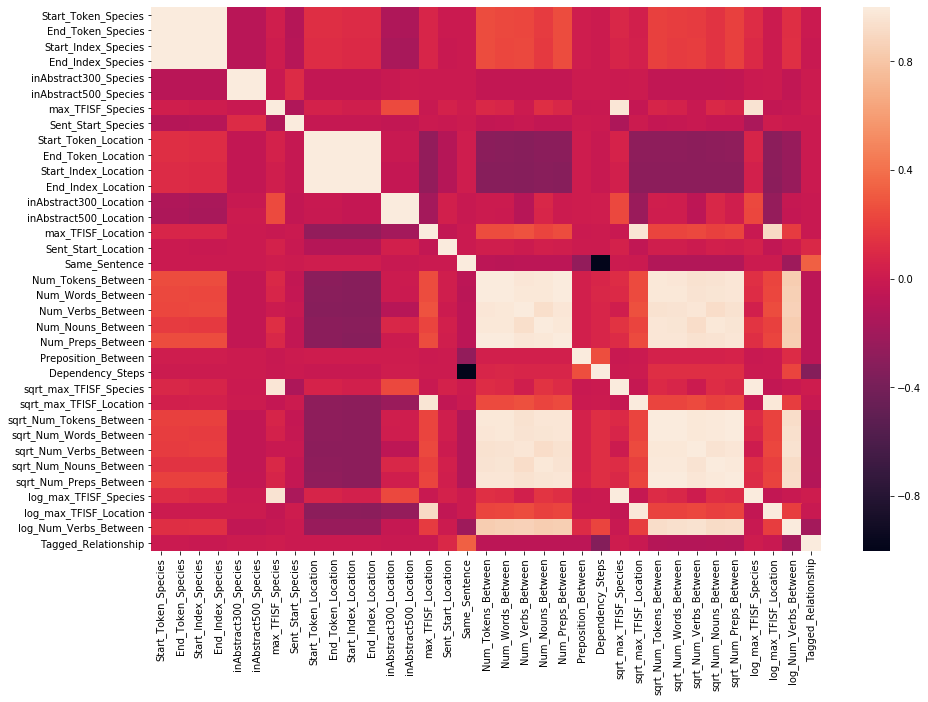

In [227]:
corr = relations.corr()
sns.heatmap(corr)

In [4]:
features_all = ['inAbstract300_Species', 'inAbstract500_Species', 'max_TFISF_Species','Sent_Start_Species', 
                'inAbstract300_Location', 'inAbstract500_Location','max_TFISF_Location', 'Sent_Start_Location', 
                'Same_Sentence','Num_Tokens_Between', 'Num_Words_Between', 'Num_Verbs_Between','Num_Nouns_Between',
                'Num_Preps_Between', 'Preposition_Between','Dependency_Steps', 'sqrt_max_TFISF_Species', 
                'sqrt_max_TFISF_Location','sqrt_Num_Tokens_Between', 'sqrt_Num_Words_Between',
                'sqrt_Num_Verbs_Between', 'sqrt_Num_Nouns_Between','sqrt_Num_Preps_Between', 
                'log_max_TFISF_Species','log_max_TFISF_Location', 'log_Num_Verbs_Between']
features_cat = ['inAbstract300_Species', 'inAbstract500_Species', 'Sent_Start_Species', 
                'inAbstract300_Location', 'inAbstract500_Location', 'Sent_Start_Location', 
                'Same_Sentence', 'Preposition_Between']
features_raw = features_all[:16]

In [5]:
y = relations.Tagged_Relationship

In [6]:
X = relations[features_all]

## Test / Train Split

In [7]:
x = relations[features_all+['Document', 'Tagged_Relationship']]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x ,x['Tagged_Relationship'], 
                                                    test_size=0.3, #30% retained for testing
                                                    random_state=0, shuffle=True,
                                                    stratify=x[['Document', 'Tagged_Relationship']])
# x_val, x_test, y_val, y_test = train_test_split(x_temp ,y_temp, 
#                                                     test_size=0.5, #splitting the other 50% into validation and test for an overall 50/25/25 split
#                                                     random_state=0, stratify=x_temp[['Document', 'Tagged_Relationship']])
# del x_temp
# del y_temp
train=x_train.copy()
x_train.drop(columns=['Document', 'Tagged_Relationship'], inplace=True)
x_test_with_document = x_test.copy()
x_test.drop(columns=['Document', 'Tagged_Relationship'], inplace=True)

In [9]:
print('Size of training sets:', len(x_train), len(y_train))
# print('Size of validation sets:', len(x_val), len(y_val))
print('Size of test sets:', len(x_test), len(y_test))

Size of training sets: 14992 14992
Size of test sets: 6426 6426


In [10]:
y_train.value_counts()

0    14901
1       91
Name: Tagged_Relationship, dtype: int64

In [11]:
y_test.value_counts()

0    6388
1      38
Name: Tagged_Relationship, dtype: int64

## Models

### Adaboost

In [12]:
adaboost_clf = AdaBoostClassifier(random_state=0)

In [13]:
adaboost_clf.fit(x_train[features_raw], y_train)

AdaBoostClassifier(random_state=0)

In [14]:
y_pred_adaboost = adaboost_clf.predict(x_test[features_raw])

In [196]:
print(metrics.classification_report(y_test, y_pred_adaboost))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6388
           1       0.57      0.34      0.43        38

    accuracy                           0.99      6426
   macro avg       0.78      0.67      0.71      6426
weighted avg       0.99      0.99      0.99      6426



In [197]:
print(metrics.confusion_matrix(y_test, y_pred_adaboost))

[[6378   10]
 [  25   13]]


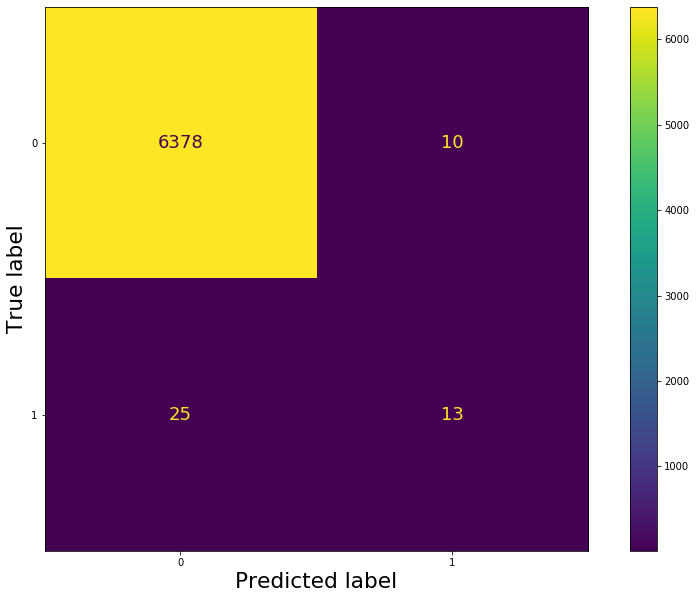

In [198]:
plot_confusion_matrix(adaboost_clf, x_test[features_raw], y_test)

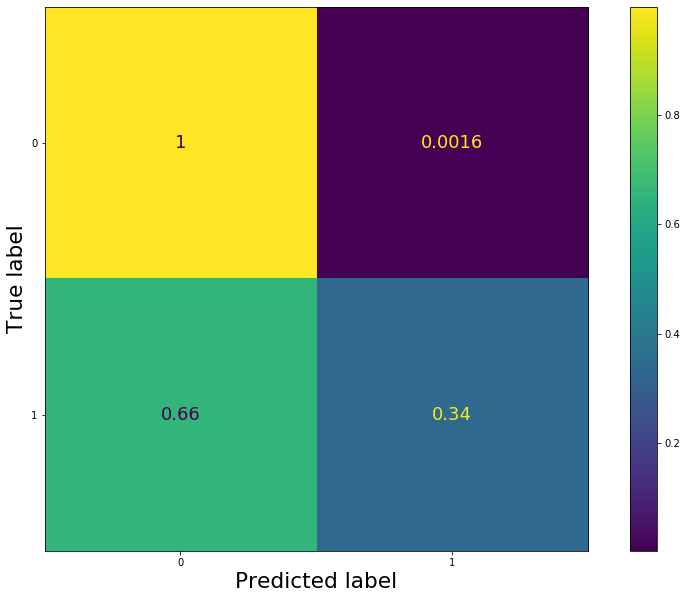

In [199]:
plot_confusion_matrix(adaboost_clf, x_test[features_raw], y_test, normalize='true')

In [19]:
pd.DataFrame(sorted(list(zip(features_raw, adaboost_clf.feature_importances_)), key = lambda x:x[1], reverse = True), 
             columns=['Feature', 'Importance'])

,Feature,Importance
0,max_TFISF_Location,0.26
1,Num_Tokens_Between,0.26
2,Num_Nouns_Between,0.10
3,Num_Preps_Between,0.10
4,Num_Words_Between,0.08
5,Num_Verbs_Between,0.08
6,max_TFISF_Species,0.06
7,Sent_Start_Location,0.04
8,Dependency_Steps,0.02
9,inAbstract300_Species,0.00


In [20]:
top_abst_features = list(pd.DataFrame(sorted(list(zip(features_all, adaboost_clf.feature_importances_)), key = lambda x:x[1], reverse = True), 
             columns=['Feature', 'Importance'])['Feature'][:10])
top_abst_features

['max_TFISF_Location',
 'Num_Tokens_Between',
 'Num_Nouns_Between',
 'Num_Preps_Between',
 'Num_Words_Between',
 'Num_Verbs_Between',
 'max_TFISF_Species',
 'Sent_Start_Location',
 'Dependency_Steps',
 'inAbstract300_Species']

### Light Gradient Boosting Machine (LGBM)

In [26]:
lgbm_clf = lgbm.LGBMClassifier(random_state=0)

In [27]:
lgbm_clf.fit(x_train[features_raw], y_train)

LGBMClassifier(random_state=0)

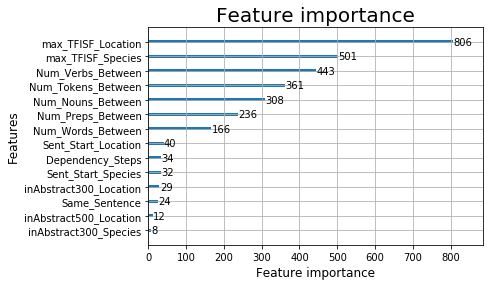

In [28]:
lgbm.plot_importance(lgbm_clf)

In [166]:
lgbm_feat_imp = pd.DataFrame(sorted(list(zip(features_raw, lgbm_clf.feature_importances_)), key = lambda x:x[1], reverse = True), 
             columns=['Feature', 'Importance'])
lgbm_feat_imp['Normalised']= lgbm_feat_imp.Importance / lgbm_feat_imp.Importance.sum() 

In [167]:
lgbm_feat_imp

,Feature,Importance,Normalised
0,max_TFISF_Location,806,0.268667
1,max_TFISF_Species,501,0.167000
2,Num_Verbs_Between,443,0.147667
3,Num_Tokens_Between,361,0.120333
4,Num_Nouns_Between,308,0.102667
5,Num_Preps_Between,236,0.078667
6,Num_Words_Between,166,0.055333
7,Sent_Start_Location,40,0.013333
8,Dependency_Steps,34,0.011333
9,Sent_Start_Species,32,0.010667


In [31]:
top_lgbm_features = list(pd.DataFrame(sorted(list(zip(features_raw, lgbm_clf.feature_importances_)), key = lambda x:x[1], reverse = True), 
             columns=['Feature', 'Importance'])['Feature'][:14])
top_lgbm_features

['max_TFISF_Location',
 'max_TFISF_Species',
 'Num_Verbs_Between',
 'Num_Tokens_Between',
 'Num_Nouns_Between',
 'Num_Preps_Between',
 'Num_Words_Between',
 'Sent_Start_Location',
 'Dependency_Steps',
 'Sent_Start_Species',
 'inAbstract300_Location',
 'Same_Sentence',
 'inAbstract500_Location',
 'inAbstract300_Species']

In [32]:
y_pred_lgbm = lgbm_clf.predict(x_test[features_raw])

In [33]:
print(metrics.classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6388
           1       0.75      0.55      0.64        38

    accuracy                           1.00      6426
   macro avg       0.87      0.78      0.82      6426
weighted avg       1.00      1.00      1.00      6426



In [34]:
print(metrics.confusion_matrix(y_test, y_pred_lgbm))

[[6381    7]
 [  17   21]]


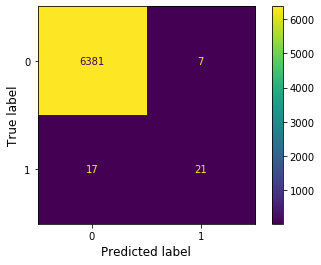

In [35]:
plot_confusion_matrix(lgbm_clf, x_test[features_raw], y_test)

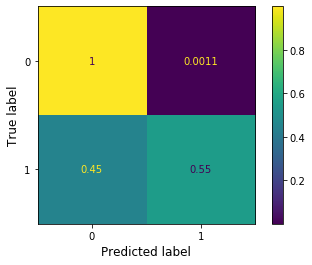

In [36]:
plot_confusion_matrix(lgbm_clf, x_test[features_raw], y_test, normalize='true')

### Random Forest Classifier

In [226]:
rf_clf = RandomForestClassifier(random_state=0)

In [220]:
rf_clf.fit(x_train[features_raw], y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [221]:
pd.DataFrame(sorted(list(zip(features_raw, rf_clf.feature_importances_)), key = lambda x:x[1], reverse = True), 
             columns=['Feature', 'Importance'])

,Feature,Importance
0,Num_Preps_Between,0.172820
1,Num_Words_Between,0.152416
2,max_TFISF_Location,0.136103
3,Num_Tokens_Between,0.135391
4,Num_Verbs_Between,0.132413
5,Num_Nouns_Between,0.116137
6,Sent_Start_Location,0.053231
7,max_TFISF_Species,0.051838
8,Same_Sentence,0.013445
9,Dependency_Steps,0.012436


In [222]:
top_rf_features = list(pd.DataFrame(sorted(list(zip(features_raw, rf_clf.feature_importances_)), key = lambda x:x[1], reverse = True), 
             columns=['Feature', 'Importance'])['Feature'][:10])
top_rf_features

['Num_Preps_Between',
 'Num_Words_Between',
 'max_TFISF_Location',
 'Num_Tokens_Between',
 'Num_Verbs_Between',
 'Num_Nouns_Between',
 'Sent_Start_Location',
 'max_TFISF_Species',
 'Same_Sentence',
 'Dependency_Steps']

In [223]:
y_pred_rf = rf_clf.predict(x_test[features_raw])

In [224]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6388
           1       0.88      0.39      0.55        38

    accuracy                           1.00      6426
   macro avg       0.94      0.70      0.77      6426
weighted avg       1.00      1.00      1.00      6426



In [225]:
print(metrics.confusion_matrix(y_test, y_pred_rf))

[[6386    2]
 [  23   15]]


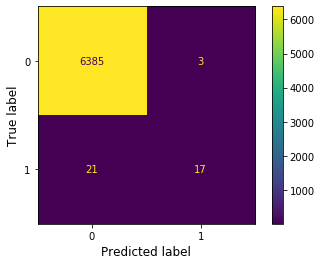

In [44]:
plot_confusion_matrix(rf_clf, x_test[features_raw], y_test)

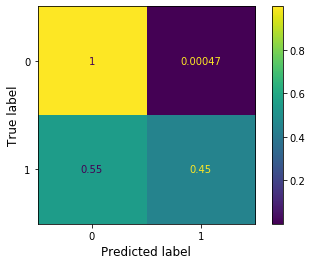

In [45]:
plot_confusion_matrix(rf_clf, x_test[features_raw], y_test, normalize='true')

### Extra Randomised Trees

In [46]:
from sklearn.ensemble import ExtraTreesClassifier

In [47]:
xt_clf = ExtraTreesClassifier(random_state=0)

In [48]:
xt_clf.fit(x_train[features_raw], y_train)

ExtraTreesClassifier(random_state=0)

In [49]:
pd.DataFrame(sorted(list(zip(features_raw, xt_clf.feature_importances_)), key = lambda x:x[1], reverse = True), 
             columns=['Feature', 'Importance'])

,Feature,Importance
0,max_TFISF_Location,0.146058
1,Num_Words_Between,0.131743
2,Num_Tokens_Between,0.131633
3,Num_Preps_Between,0.121627
4,Num_Nouns_Between,0.110539
5,Num_Verbs_Between,0.109501
6,max_TFISF_Species,0.065689
7,Dependency_Steps,0.058869
8,Sent_Start_Location,0.049129
9,Same_Sentence,0.042472


In [50]:
top_et_features = list(pd.DataFrame(sorted(list(zip(features_raw, xt_clf.feature_importances_)), key = lambda x:x[1], reverse = True), 
             columns=['Feature', 'Importance'])['Feature'][:10])
top_et_features

['max_TFISF_Location',
 'Num_Words_Between',
 'Num_Tokens_Between',
 'Num_Preps_Between',
 'Num_Nouns_Between',
 'Num_Verbs_Between',
 'max_TFISF_Species',
 'Dependency_Steps',
 'Sent_Start_Location',
 'Same_Sentence']

In [51]:
y_pred_xt = xt_clf.predict(x_test[features_raw])

In [52]:
print(metrics.classification_report(y_test, y_pred_xt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6388
           1       1.00      0.55      0.71        38

    accuracy                           1.00      6426
   macro avg       1.00      0.78      0.86      6426
weighted avg       1.00      1.00      1.00      6426



In [53]:
print(metrics.confusion_matrix(y_test, y_pred_xt))

[[6388    0]
 [  17   21]]


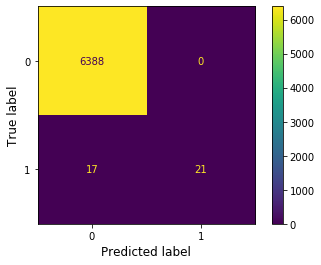

In [54]:
plot_confusion_matrix(xt_clf, x_test[features_raw], y_test)

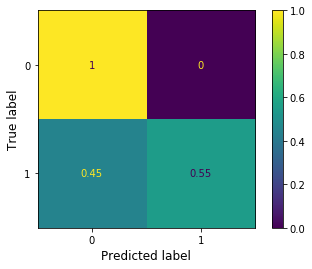

In [55]:
plot_confusion_matrix(xt_clf, x_test[features_raw], y_test, normalize='true')

### Logistic Regression

In [228]:
from sklearn.linear_model import LogisticRegression

In [235]:
logReg_clf = LogisticRegression(random_state=0, solver='liblinear', class_weight='')

In [236]:
logReg_clf.fit(x_train[features_all], y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [237]:
y_pred_logReg = logReg_clf.predict(x_test[features_all])

In [238]:
print(metrics.classification_report(y_test, y_pred_logReg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6388
           1       0.58      0.18      0.28        38

    accuracy                           0.99      6426
   macro avg       0.79      0.59      0.64      6426
weighted avg       0.99      0.99      0.99      6426



In [239]:
print(metrics.confusion_matrix(y_test, y_pred_logReg))

[[6383    5]
 [  31    7]]


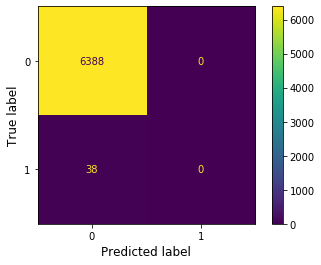

In [253]:
plot_confusion_matrix(logReg_clf, x_test, y_test)

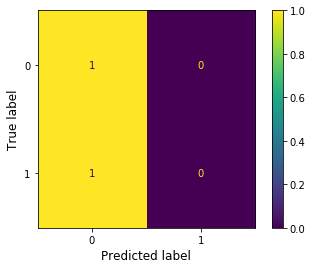

In [254]:
plot_confusion_matrix(logReg_clf, x_test, y_test, normalize='true')

In [108]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [109]:
features_all

['inAbstract300_Species',
 'inAbstract500_Species',
 'max_TFISF_Species',
 'Sent_Start_Species',
 'inAbstract300_Location',
 'inAbstract500_Location',
 'max_TFISF_Location',
 'Sent_Start_Location',
 'Same_Sentence',
 'Num_Tokens_Between',
 'Num_Words_Between',
 'Num_Verbs_Between',
 'Num_Nouns_Between',
 'Num_Preps_Between',
 'Preposition_Between',
 'Dependency_Steps',
 'sqrt_max_TFISF_Species',
 'sqrt_max_TFISF_Location',
 'sqrt_Num_Tokens_Between',
 'sqrt_Num_Words_Between',
 'sqrt_Num_Verbs_Between',
 'sqrt_Num_Nouns_Between',
 'sqrt_Num_Preps_Between',
 'log_max_TFISF_Species',
 'log_max_TFISF_Location',
 'log_Num_Verbs_Between']

In [216]:
feats_logReg = features_all.copy()
for item in ['inAbstract300_Species', 'inAbstract500_Species',  'inAbstract300_Location',
             'inAbstract500_Location', 'sqrt_Num_Tokens_Between', 'Preposition_Between', 'sqrt_max_TFISF_Species',
            'log_max_TFISF_Species', 'Sent_Start_Species','sqrt_Num_Verbs_Between','max_TFISF_Species',
             'log_Num_Verbs_Between','sqrt_Num_Nouns_Between']:
    feats_logReg.remove(item)
feats_logReg

['max_TFISF_Location',
 'Sent_Start_Location',
 'Same_Sentence',
 'Num_Tokens_Between',
 'Num_Words_Between',
 'Num_Verbs_Between',
 'Num_Nouns_Between',
 'Num_Preps_Between',
 'Dependency_Steps',
 'sqrt_max_TFISF_Location',
 'sqrt_Num_Words_Between',
 'sqrt_Num_Preps_Between',
 'log_max_TFISF_Location']

In [217]:
logReg_mod_formula = "Tagged_Relationship ~ "
for feat in feats_logReg[:-1]:
    logReg_mod_formula = logReg_mod_formula + feat + ' + '
logReg_mod_formula = logReg_mod_formula + feats_logReg[-1]
logReg_mod_formula

'Tagged_Relationship ~ max_TFISF_Location + Sent_Start_Location + Same_Sentence + Num_Tokens_Between + Num_Words_Between + Num_Verbs_Between + Num_Nouns_Between + Num_Preps_Between + Dependency_Steps + sqrt_max_TFISF_Location + sqrt_Num_Words_Between + sqrt_Num_Preps_Between + log_max_TFISF_Location'

In [218]:
logReg_mod = logit(logReg_mod_formula, pd.concat([x_train, y_train], axis=1)).fit()

Optimization terminated successfully.
         Current function value: 0.019938
         Iterations 18


In [219]:
print(logReg_mod.summary())

                            Logit Regression Results                           
Dep. Variable:     Tagged_Relationship   No. Observations:                14992
Model:                           Logit   Df Residuals:                    14978
Method:                            MLE   Df Model:                           13
Date:                 Mon, 08 Mar 2021   Pseudo R-squ.:                  0.4616
Time:                         14:08:10   Log-Likelihood:                -298.91
converged:                        True   LL-Null:                       -555.22
Covariance Type:             nonrobust   LLR p-value:                3.032e-101
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -348.4654    214.516     -1.624      0.104    -768.910      71.979
max_TFISF_Location          6.5031      2.824      2.303      0.021       0.969     

In [220]:
logReg_mod.pred_table()

array([[1.489e+04, 1.100e+01],
       [7.300e+01, 1.800e+01]])

In [221]:
y_pred_logReg2 = logReg_mod.predict(x_test)

In [222]:
y_pred_logReg2_round = np.round(y_pred_logReg2)

In [223]:
print(metrics.confusion_matrix(y_test, y_pred_logReg2_round))

[[6386    2]
 [  31    7]]


In [224]:
print(metrics.classification_report(y_test, y_pred_logReg2_round))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6388
           1       0.78      0.18      0.30        38

    accuracy                           0.99      6426
   macro avg       0.89      0.59      0.65      6426
weighted avg       0.99      0.99      0.99      6426



In [284]:
combinedFeats = list(set(top_abst_features+ top_et_features+ top_lgbm_features+ top_rf_features))

### Neural Network

In [168]:
y_test_NN = np.ravel(y_test)
y_train_NN = np.ravel(y_train)

In [ ]:
y_train

In [281]:
scaler = StandardScaler().fit(x_train)

In [282]:
# x_train_scaled = scaler.transform(x_train[combinedFeats])
# x_test_scaled = scaler.transform(x_test[combinedFeats])  
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)  

In [171]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [283]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [284]:
model.compile(
    loss='binary_crossentropy',
              optimizer='sgd',
              metrics=[tf.keras.metrics.Recall()]
)

In [285]:
model.fit(x_train_scaled, y_train_NN, epochs=20, 
          batch_size=32, 
          verbose=1
         )

Epoch 1/20
14992/14992 [==============================] - 1s 36us/step - loss: 0.1336 - recall_3: 0.0000e+00
Epoch 2/20
14992/14992 [==============================] - 1s 37us/step - loss: 0.0582 - recall_3: 0.0000e+00
Epoch 3/20
14992/14992 [==============================] - 0s 31us/step - loss: 0.0431 - recall_3: 0.0020
Epoch 4/20
14992/14992 [==============================] - 0s 27us/step - loss: 0.0385 - recall_3: 0.0367
Epoch 5/20
14992/14992 [==============================] - 0s 31us/step - loss: 0.0355 - recall_3: 0.0433
Epoch 6/20
14992/14992 [==============================] - 0s 30us/step - loss: 0.0332 - recall_3: 0.0494
Epoch 7/20
14992/14992 [==============================] - 0s 30us/step - loss: 0.0314 - recall_3: 0.0547
Epoch 8/20
14992/14992 [==============================] - 0s 29us/step - loss: 0.0297 - recall_3: 0.0572
Epoch 9/20
14992/14992 [==============================] - 0s 26us/step - loss: 0.0283 - recall_3: 0.0723
Epoch 10/20
14992/14992 [======================

In [286]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                1728      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 5,953
Trainable params: 5,953
Non-trainable params: 0
_________________________________________________________________


In [287]:
y_pred_NN = model.predict_classes(x_test_scaled)

In [288]:
set(y_pred_NN[:,0])

{0, 1}

In [289]:
print(metrics.confusion_matrix(y_test, y_pred_NN))

[[6387    1]
 [  36    2]]


In [290]:
print(metrics.classification_report(y_test, y_pred_NN))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6388
           1       0.67      0.05      0.10        38

    accuracy                           0.99      6426
   macro avg       0.83      0.53      0.55      6426
weighted avg       0.99      0.99      0.99      6426



### kNN

In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [273]:
scaler = StandardScaler().fit(x_train[features_raw])

In [274]:
# x_train_scaled = scaler.transform(x_train[combinedFeats])
# x_test_scaled = scaler.transform(x_test[combinedFeats])  
x_train_scaled = scaler.transform(x_train[features_raw])
x_test_scaled = scaler.transform(x_test[features_raw])  

In [215]:
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [216]:
knn_clf.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [217]:
y_pred_knn = knn_clf.predict(x_test_scaled)

In [218]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6388
           1       0.58      0.18      0.28        38

    accuracy                           0.99      6426
   macro avg       0.79      0.59      0.64      6426
weighted avg       0.99      0.99      0.99      6426



In [204]:
print(metrics.confusion_matrix(y_test, y_pred_knn))

[[6386    2]
 [  36    2]]


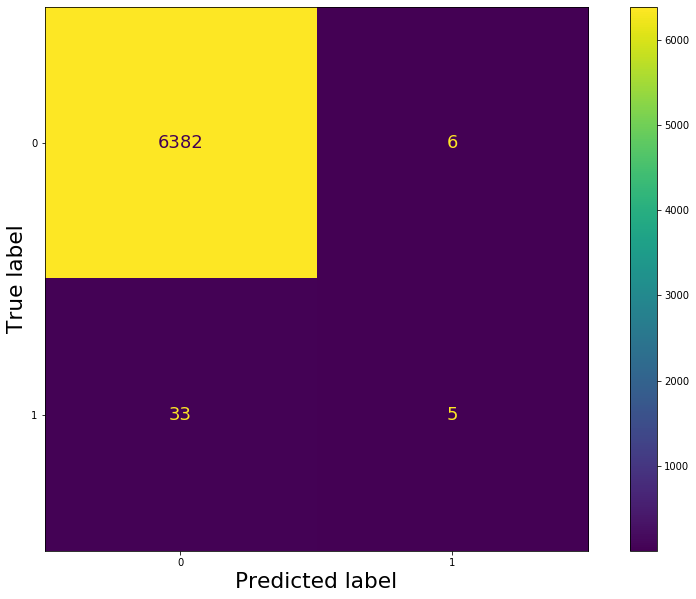

In [194]:
plot_confusion_matrix(knn_clf, x_test_scaled, y_test)

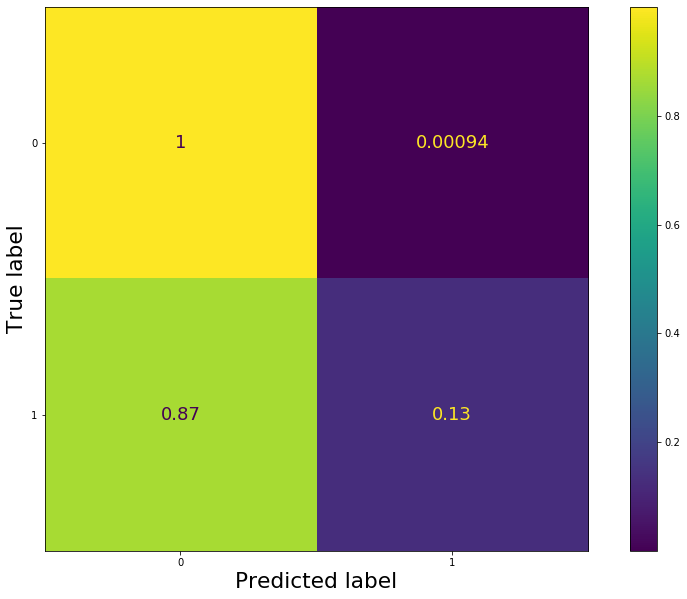

In [195]:
plot_confusion_matrix(knn_clf, x_test_scaled, y_test, normalize='true')

## Downsampling

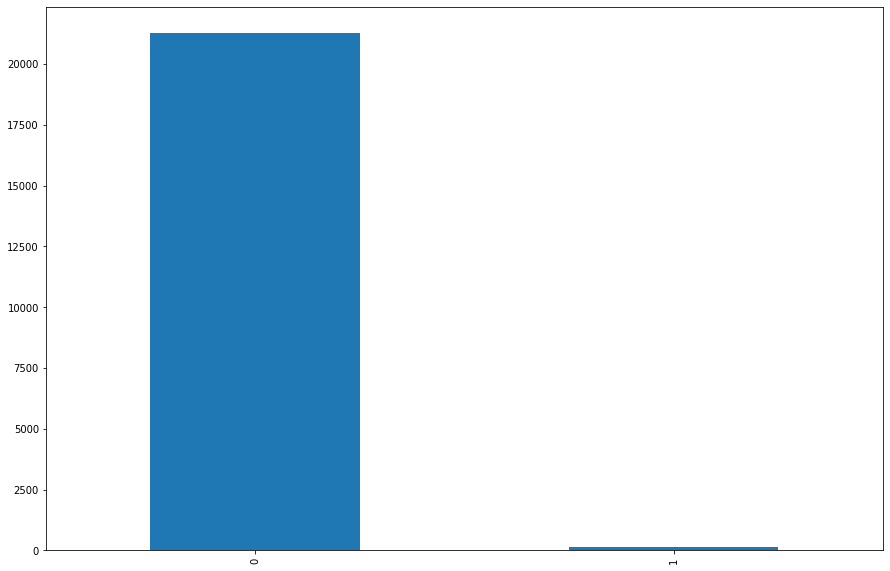

In [351]:
relations['Tagged_Relationship'].value_counts().plot.bar()

In [56]:
print('Actual Relationships:', relations['Tagged_Relationship'].value_counts()[1])
print('Not Relationships:', relations['Tagged_Relationship'].value_counts()[0])
print('Ratio of non to true: ', int(relations['Tagged_Relationship'].value_counts()[0]/relations['Tagged_Relationship'].value_counts()[1]), ':1', sep='')

Actual Relationships: 129
Not Relationships: 21289
Ratio of non to true: 165:1


In [57]:
def create_downsample(training_df, features, target_variable, ratio_of_majority_to_minority):

    df = training_df[[target_variable] + features]
    
    negative = df[df[target_variable]==0]
    positive = df[df[target_variable]==1]

    negative_downsampled = resample(negative,
                                replace = False, # sample without replacement
                                n_samples = len(positive)*ratio_of_majority_to_minority, 
                                random_state = 0, stratify=negative['Document']) 
    # combine minority and downsampled majority
    downsampled = pd.concat([negative_downsampled, positive])
    
    print(downsampled[target_variable].value_counts())
                      
    return downsampled

In [58]:
downsample1to1 = create_downsample(train, features_all+['Document'], 'Tagged_Relationship', 1)
downsample2to1 = create_downsample(train, features_all+['Document'], 'Tagged_Relationship', 2)
downsample5to1 = create_downsample(train, features_all+['Document'], 'Tagged_Relationship', 5)
downsample10to1 = create_downsample(train, features_all+['Document'], 'Tagged_Relationship', 10)
downsample50to1 = create_downsample(train, features_all+['Document'], 'Tagged_Relationship', 50)
downsample100to1 = create_downsample(train, features_all+['Document'], 'Tagged_Relationship', 100)

1    91
0    91
Name: Tagged_Relationship, dtype: int64
0    182
1     91
Name: Tagged_Relationship, dtype: int64
0    455
1     91
Name: Tagged_Relationship, dtype: int64
0    910
1     91
Name: Tagged_Relationship, dtype: int64
0    4550
1      91
Name: Tagged_Relationship, dtype: int64
0    9100
1      91
Name: Tagged_Relationship, dtype: int64


In [59]:
downsamples=[downsample100to1, downsample50to1, downsample10to1, downsample5to1, downsample2to1]
samplenames = ['downsample100to1', 'downsample50to1', 'downsample10to1', 'downsample5to1', 'downsample2to1']

In [71]:
model = []
sample = []
Precision = []
Recall = []
F1 = []

model.append('LGBM - Full Train Sample')
lgbm_clf =lgbm.LGBMClassifier(random_state=0)
lgbm_clf.fit(x_train[features_raw], y_train)
y_pred_lgbm = lgbm_clf.predict(x_test[features_raw])
F1.append(metrics.f1_score(y_test, y_pred_lgbm))
Recall.append(metrics.recall_score(y_test, y_pred_lgbm))
Precision.append(metrics.precision_score(y_test, y_pred_lgbm))

for sample, name in zip(downsamples, samplenames):
    ds_x_train = sample[features_raw]
    ds_y_train = sample['Tagged_Relationship']

    model.append('LGBM-'+name)
#     print('LGBM with', name)
#     print('-------------------------')
    ds_lgbm_clf = lgbm.LGBMClassifier(random_state=0)
    ds_lgbm_clf.fit(ds_x_train[features_raw], ds_y_train)
#     y_pred_ds_lgbm_val = ds_lgbm_clf.predict(ds_x_val[features_raw])
    y_pred_ds_lgbm_test = ds_lgbm_clf.predict(x_test[features_raw])
    
    F1.append(metrics.f1_score(y_test, y_pred_ds_lgbm_test))
    Recall.append(metrics.recall_score(y_test, y_pred_ds_lgbm_test))
    Precision.append(metrics.precision_score(y_test, y_pred_ds_lgbm_test))
    
model.append('Extra Trees - Full Train Sample')
et_clf =lgbm.LGBMClassifier(random_state=0)
et_clf.fit(x_train[features_raw], y_train)
y_pred_et = et_clf.predict(x_test[features_raw])
F1.append(metrics.f1_score(y_test, y_pred_et))
Recall.append(metrics.recall_score(y_test, y_pred_et))
Precision.append(metrics.precision_score(y_test, y_pred_et))

for sample, name in zip(downsamples, samplenames):
    ds_x_train = sample[features_raw]
    ds_y_train = sample['Tagged_Relationship']
    
    
    model.append('Extra Trees - '+ name)

    ds_et_clf = ExtraTreesClassifier(random_state=0)
    ds_et_clf.fit(ds_x_train[features_raw], ds_y_train)
#     y_pred_ds_et_val = ds_et_clf.predict(ds_x_val[features_raw])
    y_pred_ds_et_test = ds_et_clf.predict(x_test[features_raw])
    
    F1.append(metrics.f1_score(y_test, y_pred_ds_et_test))
    Recall.append(metrics.recall_score(y_test, y_pred_ds_et_test))
    Precision.append(metrics.precision_score(y_test, y_pred_ds_et_test))
    
model.append('Random Forest - Full Train Sample')
rf_clf =lgbm.LGBMClassifier(random_state=0)
rf_clf.fit(x_train[features_raw], y_train)
y_pred_rf = rf_clf.predict(x_test[features_raw])
F1.append(metrics.f1_score(y_test, y_pred_rf))
Recall.append(metrics.recall_score(y_test, y_pred_rf))
Precision.append(metrics.precision_score(y_test, y_pred_rf))

for sample, name in zip(downsamples, samplenames):
    ds_x_train = sample[features_raw]
    ds_y_train = sample['Tagged_Relationship']
    

    
    model.append('Random Forest - '+ name)
#     print('Extra Trees Classifier with', name)
#     print('--------------------------------------------')
    ds_rf_clf = ExtraTreesClassifier(random_state=0)
    ds_rf_clf.fit(ds_x_train[features_raw], ds_y_train)
#     y_pred_ds_rf_val = ds_rf_clf.predict(ds_x_val[features_raw])
    y_pred_ds_rf_test = ds_rf_clf.predict(x_test[features_raw])

    
    F1.append(metrics.f1_score(y_test, y_pred_ds_rf_test))
    Recall.append(metrics.recall_score(y_test, y_pred_ds_rf_test))
    Precision.append(metrics.precision_score(y_test, y_pred_ds_rf_test))

In [74]:
model = []
sampling = []
Precision = []
Recall = []
F1 = []

model.append('LGBM')
sampling.append('Full Train Sample')
lgbm_clf =lgbm.LGBMClassifier(random_state=0)
lgbm_clf.fit(x_train[features_raw], y_train)
y_pred_lgbm = lgbm_clf.predict(x_test[features_raw])
F1.append(metrics.f1_score(y_test, y_pred_lgbm))
Recall.append(metrics.recall_score(y_test, y_pred_lgbm))
Precision.append(metrics.precision_score(y_test, y_pred_lgbm))

for sample, name in zip(downsamples, samplenames):
    ds_x_train = sample[features_raw]
    ds_y_train = sample['Tagged_Relationship']

    model.append('LGBM')
    sampling.append(name)

    ds_lgbm_clf = lgbm.LGBMClassifier(random_state=0)
    ds_lgbm_clf.fit(ds_x_train[features_raw], ds_y_train)
    y_pred_ds_lgbm_test = ds_lgbm_clf.predict(x_test[features_raw])
    
    F1.append(metrics.f1_score(y_test, y_pred_ds_lgbm_test))
    Recall.append(metrics.recall_score(y_test, y_pred_ds_lgbm_test))
    Precision.append(metrics.precision_score(y_test, y_pred_ds_lgbm_test))
    
model.append('Extra Trees')
sampling.append('Full Train Sample')
et_clf =lgbm.LGBMClassifier(random_state=0)
et_clf.fit(x_train[features_raw], y_train)
y_pred_et = et_clf.predict(x_test[features_raw])
F1.append(metrics.f1_score(y_test, y_pred_et))
Recall.append(metrics.recall_score(y_test, y_pred_et))
Precision.append(metrics.precision_score(y_test, y_pred_et))

for sample, name in zip(downsamples, samplenames):
    ds_x_train = sample[features_raw]
    ds_y_train = sample['Tagged_Relationship']
    
    model.append('Extra Trees')
    sampling.append(name)
    
    ds_et_clf = ExtraTreesClassifier(random_state=0)
    ds_et_clf.fit(ds_x_train[features_raw], ds_y_train)
    y_pred_ds_et_test = ds_et_clf.predict(x_test[features_raw])


    
    F1.append(metrics.f1_score(y_test, y_pred_ds_et_test))
    Recall.append(metrics.recall_score(y_test, y_pred_ds_et_test))
    Precision.append(metrics.precision_score(y_test, y_pred_ds_et_test))
    
model.append('Random Forest')
sampling.append('Full Train Sample')
rf_clf =lgbm.LGBMClassifier(random_state=0)
rf_clf.fit(x_train[features_raw], y_train)
y_pred_rf = rf_clf.predict(x_test[features_raw])
F1.append(metrics.f1_score(y_test, y_pred_rf))
Recall.append(metrics.recall_score(y_test, y_pred_rf))
Precision.append(metrics.precision_score(y_test, y_pred_rf))

for sample, name in zip(downsamples, samplenames):
    ds_x_train = sample[features_raw]
    ds_y_train = sample['Tagged_Relationship']

    
    model.append('Random Forest')
    sampling.append(name)

    ds_rf_clf = ExtraTreesClassifier(random_state=0)
    ds_rf_clf.fit(ds_x_train[features_raw], ds_y_train)
    y_pred_ds_rf_test = ds_rf_clf.predict(x_test[features_raw])

    F1.append(metrics.f1_score(y_test, y_pred_ds_rf_test))
    Recall.append(metrics.recall_score(y_test, y_pred_ds_rf_test))
    Precision.append(metrics.precision_score(y_test, y_pred_ds_rf_test))

In [75]:
pd.DataFrame({'Model':model, 'Sample':sampling, 'Precision': Precision, 'Recall': Recall, 'F1': F1}).sort_values('F1', ascending=False)

,Model,Sample,Precision,Recall,F1
14,Random Forest,downsample50to1,0.690476,0.763158,0.725000
8,Extra Trees,downsample50to1,0.690476,0.763158,0.725000
13,Random Forest,downsample100to1,0.880000,0.578947,0.698413
7,Extra Trees,downsample100to1,0.880000,0.578947,0.698413
0,LGBM,Full Train Sample,0.750000,0.552632,0.636364
12,Random Forest,Full Train Sample,0.750000,0.552632,0.636364
6,Extra Trees,Full Train Sample,0.750000,0.552632,0.636364
2,LGBM,downsample50to1,0.508772,0.763158,0.610526
1,LGBM,downsample100to1,0.656250,0.552632,0.600000
15,Random Forest,downsample10to1,0.244604,0.894737,0.384181


In [190]:
model = []
Precision = []
Recall = []
F1 = []

model.append('LGBM - Full Train Sample')
lgbm_clf =lgbm.LGBMClassifier(random_state=0)
lgbm_clf.fit(x_train[top_lgbm_features], y_train)
y_pred_lgbm = lgbm_clf.predict(x_test[top_lgbm_features])
F1.append(metrics.f1_score(y_test, y_pred_lgbm))
Recall.append(metrics.recall_score(y_test, y_pred_lgbm))
Precision.append(metrics.precision_score(y_test, y_pred_lgbm))

for sample, name in zip(downsamples, samplenames):
    ds_x_train = sample[top_lgbm_features]
    ds_y_train = sample['Tagged_Relationship']

    model.append('LGBM-'+name)

    ds_lgbm_clf = lgbm.LGBMClassifier(random_state=0)
    ds_lgbm_clf.fit(ds_x_train[top_lgbm_features], ds_y_train)
    y_pred_ds_lgbm_test = ds_lgbm_clf.predict(x_test[top_lgbm_features])
    
    
    F1.append(metrics.f1_score(y_test, y_pred_ds_lgbm_test))
    Recall.append(metrics.recall_score(y_test, y_pred_ds_lgbm_test))
    Precision.append(metrics.precision_score(y_test, y_pred_ds_lgbm_test))
    
model.append('Extra Trees - Full Train Sample')
et_clf =lgbm.LGBMClassifier(random_state=0)
et_clf.fit(x_train[top_lgbm_features], y_train)
y_pred_et = et_clf.predict(x_test[top_lgbm_features])
F1.append(metrics.f1_score(y_test, y_pred_et))
Recall.append(metrics.recall_score(y_test, y_pred_et))
Precision.append(metrics.precision_score(y_test, y_pred_et))

for sample, name in zip(downsamples, samplenames):
    ds_x_train = sample[top_lgbm_features]
    ds_y_train = sample['Tagged_Relationship']
    
    
    model.append('Extra Trees - '+ name)

    ds_et_clf = ExtraTreesClassifier(random_state=0)
    ds_et_clf.fit(ds_x_train[top_lgbm_features], ds_y_train)

    y_pred_ds_et_test = ds_et_clf.predict(x_test[top_lgbm_features])

    F1.append(metrics.f1_score(y_test, y_pred_ds_et_test))
    Recall.append(metrics.recall_score(y_test, y_pred_ds_et_test))
    Precision.append(metrics.precision_score(y_test, y_pred_ds_et_test))
    
model.append('Random Forest - Full Train Sample')
rf_clf =lgbm.LGBMClassifier(random_state=0)
rf_clf.fit(x_train[top_lgbm_features], y_train)
y_pred_rf = rf_clf.predict(x_test[top_lgbm_features])
F1.append(metrics.f1_score(y_test, y_pred_rf))
Recall.append(metrics.recall_score(y_test, y_pred_rf))
Precision.append(metrics.precision_score(y_test, y_pred_rf))

for sample, name in zip(downsamples, samplenames):
    ds_x_train = sample[top_lgbm_features]
    ds_y_train = sample['Tagged_Relationship']
    
    
    model.append('Random Forest - '+ name)

    ds_rf_clf = ExtraTreesClassifier(random_state=0)
    ds_rf_clf.fit(ds_x_train[top_lgbm_features], ds_y_train)

    y_pred_ds_rf_test = ds_rf_clf.predict(x_test[top_lgbm_features])
    
    F1.append(metrics.f1_score(y_test, y_pred_ds_rf_test))
    Recall.append(metrics.recall_score(y_test, y_pred_ds_rf_test))
    Precision.append(metrics.precision_score(y_test, y_pred_ds_rf_test))

In [191]:
pd.DataFrame({'Model':model, 'Precision': Precision, 'Recall': Recall, 'F1': F1}).sort_values('F1', ascending=False)

,Model,Precision,Recall,F1
14,Random Forest - downsample50to1,0.674419,0.763158,0.716049
8,Extra Trees - downsample50to1,0.674419,0.763158,0.716049
13,Random Forest - downsample100to1,0.916667,0.578947,0.709677
7,Extra Trees - downsample100to1,0.916667,0.578947,0.709677
0,LGBM - Full Train Sample,0.724138,0.552632,0.626866
12,Random Forest - Full Train Sample,0.724138,0.552632,0.626866
6,Extra Trees - Full Train Sample,0.724138,0.552632,0.626866
1,LGBM-downsample100to1,0.647059,0.578947,0.611111
2,LGBM-downsample50to1,0.491228,0.736842,0.589474
15,Random Forest - downsample10to1,0.251748,0.947368,0.397790


In [68]:
top_tree_features = top_lgbm_features[:13]
top_tree_features

['max_TFISF_Location',
 'max_TFISF_Species',
 'Num_Verbs_Between',
 'Num_Tokens_Between',
 'Num_Nouns_Between',
 'Num_Preps_Between',
 'Num_Words_Between',
 'Sent_Start_Location',
 'Dependency_Steps',
 'Sent_Start_Species',
 'inAbstract300_Location',
 'Same_Sentence',
 'inAbstract500_Location']

In [69]:
model = []
Precision = []
Recall = []
F1 = []

model.append('LGBM - Full Train Sample')
lgbm_clf =lgbm.LGBMClassifier(random_state=0)
lgbm_clf.fit(x_train[top_tree_features], y_train)
y_pred_lgbm = lgbm_clf.predict(x_test[top_tree_features])
F1.append(metrics.f1_score(y_test, y_pred_lgbm))
Recall.append(metrics.recall_score(y_test, y_pred_lgbm))
Precision.append(metrics.precision_score(y_test, y_pred_lgbm))

for sample, name in zip(downsamples, samplenames):
    ds_x_train = sample[top_tree_features]
    ds_y_train = sample['Tagged_Relationship']
#     ds_x_train, ds_x_val, ds_y_train, ds_y_val = train_test_split(x ,x['Tagged_Relationship'], 
#                                                     test_size=0.3, #30% retained for testing
#                                                     random_state=0, 
#                                                                   stratify=x[['Document', 'Tagged_Relationship']])
#     ds_x_train.drop(columns=['Document', 'Tagged_Relationship'], inplace=True)
#     ds_x_val.drop(columns=['Document', 'Tagged_Relationship'], inplace=True)

    model.append('LGBM-'+name)
#     print('LGBM with', name)
#     print('-------------------------')
    ds_lgbm_clf = lgbm.LGBMClassifier(random_state=0)
    ds_lgbm_clf.fit(ds_x_train[top_tree_features], ds_y_train)
#     y_pred_ds_lgbm_val = ds_lgbm_clf.predict(ds_x_val[features_all])
    y_pred_ds_lgbm_test = ds_lgbm_clf.predict(x_test[top_tree_features])
    
#     print('Metrics on Downsampled valuation data')
#     print(metrics.classification_report(ds_y_val, y_pred_ds_lgbm_val))
#     print(metrics.confusion_matrix(ds_y_val, y_pred_ds_lgbm_val)) 
    
#     print('Metrics on test data')
#     print(metrics.classification_report(y_test, y_pred_ds_lgbm_test))
#     print(metrics.confusion_matrix(y_test, y_pred_ds_lgbm_test)) 
#     print('\n')
    
    F1.append(metrics.f1_score(y_test, y_pred_ds_lgbm_test))
    Recall.append(metrics.recall_score(y_test, y_pred_ds_lgbm_test))
    Precision.append(metrics.precision_score(y_test, y_pred_ds_lgbm_test))
    
model.append('Extra Trees - Full Train Sample')
et_clf =lgbm.LGBMClassifier(random_state=0)
et_clf.fit(x_train[top_tree_features], y_train)
y_pred_et = et_clf.predict(x_test[top_tree_features])
F1.append(metrics.f1_score(y_test, y_pred_et))
Recall.append(metrics.recall_score(y_test, y_pred_et))
Precision.append(metrics.precision_score(y_test, y_pred_et))

for sample, name in zip(downsamples, samplenames):
    ds_x_train = sample[top_tree_features]
    ds_y_train = sample['Tagged_Relationship']
    
#     x = sample[features_all+['Document', 'Tagged_Relationship']]
#     ds_x_train, ds_x_val, ds_y_train, ds_y_val = train_test_split(x ,x['Tagged_Relationship'], 
#                                                     test_size=0.3, #30% retained for testing
#                                                     random_state=0, 
#                                                                   stratify=x[['Document', 'Tagged_Relationship']])
#     ds_x_train.drop(columns=['Document', 'Tagged_Relationship'], inplace=True)
# #     ds_x_val.drop(columns=['Document', 'Tagged_Relationship'], inplace=True)
    
    model.append('Extra Trees - '+ name)
#     print('Extra Trees Classifier with', name)
#     print('--------------------------------------------')
    ds_et_clf = ExtraTreesClassifier(random_state=0)
    ds_et_clf.fit(ds_x_train[top_tree_features], ds_y_train)
#     y_pred_ds_et_val = ds_et_clf.predict(ds_x_val[features_all])
    y_pred_ds_et_test = ds_et_clf.predict(x_test[top_tree_features])

#     print('Metrics on Downsampled validation data')
#     print(metrics.classification_report(ds_y_val, y_pred_ds_et_val))
#     print(metrics.confusion_matrix(ds_y_val, y_pred_ds_et_val)) 
    
#     print('Metrics on test data')
#     print(metrics.classification_report(y_test, y_pred_ds_et_test))
#     print(metrics.confusion_matrix(y_test, y_pred_ds_et_test)) 
#     print('\n')
    
    F1.append(metrics.f1_score(y_test, y_pred_ds_et_test))
    Recall.append(metrics.recall_score(y_test, y_pred_ds_et_test))
    Precision.append(metrics.precision_score(y_test, y_pred_ds_et_test))
    
model.append('Random Forest - Full Train Sample')
rf_clf =lgbm.LGBMClassifier(random_state=0)
rf_clf.fit(x_train[top_tree_features], y_train)
y_pred_rf = rf_clf.predict(x_test[top_tree_features])
F1.append(metrics.f1_score(y_test, y_pred_rf))
Recall.append(metrics.recall_score(y_test, y_pred_rf))
Precision.append(metrics.precision_score(y_test, y_pred_rf))

for sample, name in zip(downsamples, samplenames):
    ds_x_train = sample[top_tree_features]
    ds_y_train = sample['Tagged_Relationship']
    
#     x = sample[features_all+['Document', 'Tagged_Relationship']]
#     ds_x_train, ds_x_val, ds_y_train, ds_y_val = train_test_split(x ,x['Tagged_Relationship'], 
#                                                     test_size=0.3, #30% retained for testing
#                                                     random_state=0, 
#                                                                   stratify=x[['Document', 'Tagged_Relationship']])
#     ds_x_train.drop(columns=['Document', 'Tagged_Relationship'], inplace=True)
# #     ds_x_val.drop(columns=['Document', 'Tagged_Relationship'], inplace=True)
    
    model.append('Random Forest - '+ name)
#     print('Extra Trees Classifier with', name)
#     print('--------------------------------------------')
    ds_rf_clf = ExtraTreesClassifier(random_state=0)
    ds_rf_clf.fit(ds_x_train[top_tree_features], ds_y_train)
#     y_pred_ds_rf_val = ds_rf_clf.predict(ds_x_val[features_all])
    y_pred_ds_rf_test = ds_rf_clf.predict(x_test[top_tree_features])

#     print('Metrics on Downsampled validation data')
#     print(metrics.classification_report(ds_y_val, y_pred_ds_et_val))
#     print(metrics.confusion_matrix(ds_y_val, y_pred_ds_et_val)) 
    
#     print('Metrics on test data')
#     print(metrics.classification_report(y_test, y_pred_ds_et_test))
#     print(metrics.confusion_matrix(y_test, y_pred_ds_et_test)) 
#     print('\n')
    
    F1.append(metrics.f1_score(y_test, y_pred_ds_rf_test))
    Recall.append(metrics.recall_score(y_test, y_pred_ds_rf_test))
    Precision.append(metrics.precision_score(y_test, y_pred_ds_rf_test))

In [70]:
pd.DataFrame({'Model':model, 'Precision': Precision, 'Recall': Recall, 'F1': F1}).sort_values('F1', ascending=False)

,Model,Precision,Recall,F1
13,Random Forest - downsample100to1,0.916667,0.578947,0.709677
7,Extra Trees - downsample100to1,0.916667,0.578947,0.709677
14,Random Forest - downsample50to1,0.651163,0.736842,0.691358
8,Extra Trees - downsample50to1,0.651163,0.736842,0.691358
0,LGBM - Full Train Sample,0.714286,0.526316,0.606061
12,Random Forest - Full Train Sample,0.714286,0.526316,0.606061
6,Extra Trees - Full Train Sample,0.714286,0.526316,0.606061
1,LGBM-downsample100to1,0.656250,0.552632,0.600000
2,LGBM-downsample50to1,0.491228,0.736842,0.589474
15,Random Forest - downsample10to1,0.248175,0.894737,0.388571


## Cross Validation

In [83]:
from sklearn.model_selection import StratifiedKFold

In [84]:
from sklearn.model_selection import cross_val_score


In [62]:
scores = cross_val_score(
    lgbm_clf, X, y, cv=5, scoring='f1')
scores

array([0.26666667, 0.22222222, 0.07936508, 0.0733945 , 0.36363636])

In [533]:
relations.Tagged_Relationship.value_counts()

0    21289
1      129
Name: Tagged_Relationship, dtype: int64

In [73]:
relations.Document.value_counts(normalize=True)

fmicb-10-01018                                                            0.368148
summer-activity-patterns-for-mosses-and-lichens-in-maritime-antarctica    0.354375
s42003-018-0260-y                                                         0.150341
Archer2017_Article_EndolithicMicrobialDiversityIn                         0.053787
fmicb-07-01642                                                            0.052806
source                                                                    0.011579
Fraser2018_Article_EvidenceOfPlantAndAnimalCommun                         0.008964
Name: Document, dtype: float64

In [76]:
for source in relations.Document.unique():
    print(source, '\n',relations[relations.Document==source].Tagged_Relationship.value_counts()[1], '/', len(relations[relations.Document==source]), '\t', 
          np.round(relations[relations.Document==source].Tagged_Relationship.value_counts(normalize = True)[1],4), '\n')

Archer2017_Article_EndolithicMicrobialDiversityIn 
 11 / 1152 	 0.0095 

fmicb-07-01642 
 12 / 1131 	 0.0106 

summer-activity-patterns-for-mosses-and-lichens-in-maritime-antarctica 
 48 / 7590 	 0.0063 

s42003-018-0260-y 
 11 / 3220 	 0.0034 

Fraser2018_Article_EvidenceOfPlantAndAnimalCommun 
 4 / 192 	 0.0208 

source 
 3 / 248 	 0.0121 

fmicb-10-01018 
 40 / 7885 	 0.0051 



In [91]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [153]:
def cross_validation_with_downsample(training_df, splits, features, target_variable, ratio_of_majority_to_minority, model):
    state = 9999
    df = training_df[[target_variable]+features]
    y = np.array(df[target_variable])
    X = np.array(df[features])
    
    skf = StratifiedKFold(n_splits=splits, 
               shuffle=True, random_state=state
              )
    
    
    precision = []
    recall = []
    f1 = []
    support = []
    for train_index, test_index in skf.split(X,y):
#     for train_index, test_index in rskf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        

        df2 = pd.DataFrame(X_train, columns=features)
        df2[target_variable] = y_train
            
        negative = df2[df2[target_variable]==0]
        positive = df2[df2[target_variable]==1]

        negative_downsampled = resample(negative,
                                replace = False, # sample without replacement
                                n_samples = len(positive)*ratio_of_majority_to_minority, 
                                random_state=state) 
        
        downsampled = pd.concat([negative_downsampled, positive])
#         print(downsampled[target_variable].value_counts())
        
        y_train = np.array(downsampled[target_variable])
        X_train = np.array(downsampled[features])
#         print(X_train.shape, y_train.shape)
#         print(pd.Series(y_train).value_counts())

    
        if model == 'lgbm':
            clf = lgbm.LGBMClassifier(random_state=state)
        elif model == 'RandomForest':
            clf = RandomForestClassifier(random_state=state)
        elif model == 'ExtraTrees':
            clf = ExtraTreesClassifier(random_state=state)
            
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        
        
        metric_array = metrics.precision_recall_fscore_support(y_test, y_pred, average='binary')[0:3]
        precision.append(metric_array[0])
        recall.append(metric_array[1])
        f1.append(metric_array[2])
    
    stats = {'Precision': precision, 'Recall':recall,'F1':f1,}
    
    cross_val_df = pd.DataFrame(stats)
    cross_val_df.index.name='Fold'
    cross_val_df = cross_val_df.transpose()
    cross_val_df['Cross-Val Mean'] = cross_val_df.apply(np.mean, axis = 1)

    return cross_val_df

In [87]:
skf = StratifiedKFold(n_splits=5, 
               shuffle=True
              )

5

In [115]:
cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 100, 'lgbm')

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.640000,0.666667,0.562500,0.722222,0.863636,0.691005
Recall,0.615385,0.692308,0.692308,0.520000,0.730769,0.650154
F1,0.627451,0.679245,0.620690,0.604651,0.791667,0.664741


In [154]:
def cross_validation_no_downsample(training_df, splits, features, target_variable, model):
    state = 9999
    df = training_df[[target_variable]+features]
    y = np.array(df[target_variable])
    X = np.array(df[features])
    
    skf = StratifiedKFold(n_splits=splits, 
               shuffle=True, random_state=state
              )
    skf.get_n_splits(X, y) 
    
    precision = []
    recall = []
    f1 = []
    support = []
    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        if model == 'lgbm':
            clf = lgbm.LGBMClassifier(random_state=state)
        elif model == 'RandomForest':
            clf = RandomForestClassifier(random_state=state)
        elif model == 'ExtraTrees':
            clf = ExtraTreesClassifier(random_state=state)
            
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        
        
        metric_array = metrics.precision_recall_fscore_support(y_test, y_pred, average='binary')[0:3]
        precision.append(metric_array[0])
        recall.append(metric_array[1])
        f1.append(metric_array[2])
    
    stats = {'Precision': precision, 'Recall':recall,'F1':f1,}
    
    cross_val_df = pd.DataFrame(stats)
    cross_val_df.index.name='Fold'
    cross_val_df = cross_val_df.transpose()
    cross_val_df['Cross-Val Mean'] = cross_val_df.apply(np.mean, axis = 1)

    return cross_val_df

In [97]:
lgbmfull = cross_validation_no_downsample(relations, 5, features_raw, 'Tagged_Relationship', 'lgbm')
lgbmfull

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.727273,0.818182,0.647059,0.705882,0.941176,0.767914
Recall,0.615385,0.692308,0.423077,0.480000,0.615385,0.565231
F1,0.666667,0.750000,0.511628,0.571429,0.744186,0.648782


In [87]:
lgbmfull['Cross-Val Mean'][0]

0.5811536796536796

In [117]:
lgbm100 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 100, 'lgbm')
lgbm100

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.640000,0.666667,0.562500,0.722222,0.863636,0.691005
Recall,0.615385,0.692308,0.692308,0.520000,0.730769,0.650154
F1,0.627451,0.679245,0.620690,0.604651,0.791667,0.664741


In [118]:
lgbm50 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 50, 'lgbm')
lgbm50

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.459459,0.571429,0.486486,0.576923,0.600000,0.538860
Recall,0.653846,0.769231,0.692308,0.600000,0.807692,0.704615
F1,0.539683,0.655738,0.571429,0.588235,0.688525,0.608722


In [119]:
lgbm20 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 20, 'lgbm')
lgbm20

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.281690,0.477273,0.370968,0.384615,0.347826,0.372474
Recall,0.769231,0.807692,0.884615,0.800000,0.923077,0.836923
F1,0.412371,0.600000,0.522727,0.519481,0.505263,0.511968


In [120]:
lgbm10 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 10, 'lgbm')
lgbm10

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.271605,0.275000,0.291139,0.309859,0.285714,0.286664
Recall,0.846154,0.846154,0.884615,0.880000,0.923077,0.876000
F1,0.411215,0.415094,0.438095,0.458333,0.436364,0.431820


In [121]:
lgbm5 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 5, 'lgbm')
lgbm5

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.237113,0.211538,0.184615,0.242105,0.186047,0.212284
Recall,0.884615,0.846154,0.923077,0.920000,0.923077,0.899385
F1,0.373984,0.338462,0.307692,0.383333,0.309677,0.342630


In [122]:
lgbm2 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 2, 'lgbm')
lgbm2

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.119816,0.094118,0.106383,0.117347,0.106195,0.108772
Recall,1.000000,0.923077,0.961538,0.920000,0.923077,0.945538
F1,0.213992,0.170819,0.191571,0.208145,0.190476,0.195000


In [98]:
rffull = cross_validation_no_downsample(relations, 5, features_raw, 'Tagged_Relationship', 'RandomForest')
rffull

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.764706,0.857143,0.631579,0.923077,1.000000,0.835301
Recall,0.500000,0.461538,0.461538,0.480000,0.538462,0.488308
F1,0.604651,0.600000,0.533333,0.631579,0.700000,0.613913


In [124]:
rf100 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 100, 'RandomForest')
rf100

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.684211,0.866667,0.535714,0.875000,0.857143,0.763747
Recall,0.500000,0.500000,0.576923,0.560000,0.692308,0.565846
F1,0.577778,0.634146,0.555556,0.682927,0.765957,0.643273


In [126]:
rf50 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 50, 'RandomForest')
rf50

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.516129,0.655172,0.485714,0.625000,0.655172,0.587438
Recall,0.615385,0.730769,0.653846,0.600000,0.730769,0.666154
F1,0.561404,0.690909,0.557377,0.612245,0.690909,0.622569


In [127]:
rf20 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 20, 'RandomForest')
rf20

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.392157,0.431818,0.387755,0.488889,0.393443,0.418812
Recall,0.769231,0.730769,0.730769,0.880000,0.923077,0.806769
F1,0.519481,0.542857,0.506667,0.628571,0.551724,0.549860


In [128]:
rf10 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 10, 'RandomForest')
rf10

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.295775,0.291667,0.273973,0.359375,0.333333,0.310824
Recall,0.807692,0.807692,0.769231,0.920000,0.923077,0.845538
F1,0.432990,0.428571,0.404040,0.516854,0.489796,0.454450


In [129]:
rf5 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 5, 'RandomForest')
rf5

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.247191,0.203704,0.187500,0.282353,0.230769,0.230303
Recall,0.846154,0.846154,0.807692,0.960000,0.923077,0.876615
F1,0.382609,0.328358,0.304348,0.436364,0.369231,0.364182


In [130]:
rf2 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 2, 'RandomForest')
rf2

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.094118,0.093750,0.119403,0.120192,0.110092,0.107511
Recall,0.923077,0.923077,0.923077,1.000000,0.923077,0.938462
F1,0.170819,0.170213,0.211454,0.214592,0.196721,0.192760


In [99]:
etfull = cross_validation_no_downsample(relations, 5, features_raw, 'Tagged_Relationship', 'ExtraTrees')
etfull

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.789474,0.772727,0.666667,0.875000,0.850000,0.790774
Recall,0.576923,0.653846,0.615385,0.560000,0.653846,0.612000
F1,0.666667,0.708333,0.640000,0.682927,0.739130,0.687411


In [134]:
et100 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 100, 'ExtraTrees')
et100

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.727273,0.760000,0.516129,0.882353,0.760000,0.729151
Recall,0.615385,0.730769,0.615385,0.600000,0.730769,0.658462
F1,0.666667,0.745098,0.561404,0.714286,0.745098,0.686510


In [135]:
et50 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 50, 'ExtraTrees')
et50

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.531250,0.611111,0.439024,0.545455,0.588235,0.543015
Recall,0.653846,0.846154,0.692308,0.720000,0.769231,0.736308
F1,0.586207,0.709677,0.537313,0.620690,0.666667,0.624111


In [136]:
et20 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 20, 'ExtraTrees')
et20

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.387755,0.440000,0.358491,0.416667,0.370968,0.394776
Recall,0.730769,0.846154,0.730769,0.800000,0.884615,0.798462
F1,0.506667,0.578947,0.481013,0.547945,0.522727,0.527460


In [137]:
et10 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 10, 'ExtraTrees')
et10

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.344828,0.309859,0.283784,0.365079,0.283951,0.317500
Recall,0.769231,0.846154,0.807692,0.920000,0.884615,0.845538
F1,0.476190,0.453608,0.420000,0.522727,0.429907,0.460487


In [138]:
et5 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 5, 'ExtraTrees')
et5

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.323529,0.229167,0.200000,0.294118,0.203540,0.250071
Recall,0.846154,0.846154,0.846154,1.000000,0.884615,0.884615
F1,0.468085,0.360656,0.323529,0.454545,0.330935,0.387550


In [139]:
et2 = cross_validation_with_downsample(relations, 5, features_raw, 'Tagged_Relationship', 2, 'ExtraTrees')
et2

Fold,0,1,2,3,4,Cross-Val Mean
Precision,0.119403,0.112676,0.140244,0.152866,0.110048,0.127047
Recall,0.923077,0.923077,0.884615,0.960000,0.884615,0.915077
F1,0.211454,0.200837,0.242105,0.263736,0.195745,0.222775


In [155]:
modellist = ['lgbm', 'RandomForest', 'ExtraTrees']
modelNames = ['LGBM', 'Random Forest', 'Extra Trees']
downsamples =[100, 50, 20, 10, 5, 2]
model = []
sampling = []
Precision = []
Recall = []
F1 = []

for i, modeltype in enumerate(modellist):
    model.append(modelNames[i])
    sampling.append('Full Train Sample')
    results = cross_validation_no_downsample(relations,5,features_raw,'Tagged_Relationship', modeltype)
    F1.append(results['Cross-Val Mean'][2])
    Recall.append(results['Cross-Val Mean'][1])
    Precision.append(results['Cross-Val Mean'][0])
    
    for size in downsamples:
        model.append(modelNames[i])
        sampling.append('Downsample '+ str(size)+ ' to 1')
        results = cross_validation_with_downsample(relations,5,features_raw,'Tagged_Relationship', size, modeltype)
        F1.append(results['Cross-Val Mean'][2])
        Recall.append(results['Cross-Val Mean'][1])
        Precision.append(results['Cross-Val Mean'][0])

                     
crossValResults = pd.DataFrame({'Model':model, 'Sample':sampling, 'Precision': Precision, 'Recall': Recall, 'F1': F1}).sort_values('F1', ascending=False)

In [156]:
crossValResults

,Model,Sample,Precision,Recall,F1
1,LGBM,Downsample 100 to 1,0.714369,0.666769,0.685243
15,Extra Trees,Downsample 100 to 1,0.754360,0.611692,0.671119
14,Extra Trees,Full Train Sample,0.884561,0.535077,0.661317
8,Random Forest,Downsample 100 to 1,0.814839,0.558154,0.659163
0,LGBM,Full Train Sample,0.739273,0.566769,0.638022
9,Random Forest,Downsample 50 to 1,0.617086,0.666462,0.636299
16,Extra Trees,Downsample 50 to 1,0.590000,0.658154,0.618070
2,LGBM,Downsample 50 to 1,0.502949,0.674769,0.574422
7,Random Forest,Full Train Sample,0.801411,0.434769,0.558376
17,Extra Trees,Downsample 20 to 1,0.429621,0.798154,0.557338


In [157]:
ratio = {'Full Train Sample':165, 'Downsample 100 to 1':100, 'Downsample 50 to 1':50,
       'Downsample 20 to 1':20, 'Downsample 10 to 1':10, 'Downsample 5 to 1':5,
       'Downsample 2 to 1':2}
crossValResults['Sample Ratio']=crossValResults['Sample'].map(ratio)

In [158]:
crossValResults

,Model,Sample,Precision,Recall,F1,Sample Ratio
1,LGBM,Downsample 100 to 1,0.714369,0.666769,0.685243,100
15,Extra Trees,Downsample 100 to 1,0.754360,0.611692,0.671119,100
14,Extra Trees,Full Train Sample,0.884561,0.535077,0.661317,165
8,Random Forest,Downsample 100 to 1,0.814839,0.558154,0.659163,100
0,LGBM,Full Train Sample,0.739273,0.566769,0.638022,165
9,Random Forest,Downsample 50 to 1,0.617086,0.666462,0.636299,50
16,Extra Trees,Downsample 50 to 1,0.590000,0.658154,0.618070,50
2,LGBM,Downsample 50 to 1,0.502949,0.674769,0.574422,50
7,Random Forest,Full Train Sample,0.801411,0.434769,0.558376,165
17,Extra Trees,Downsample 20 to 1,0.429621,0.798154,0.557338,20


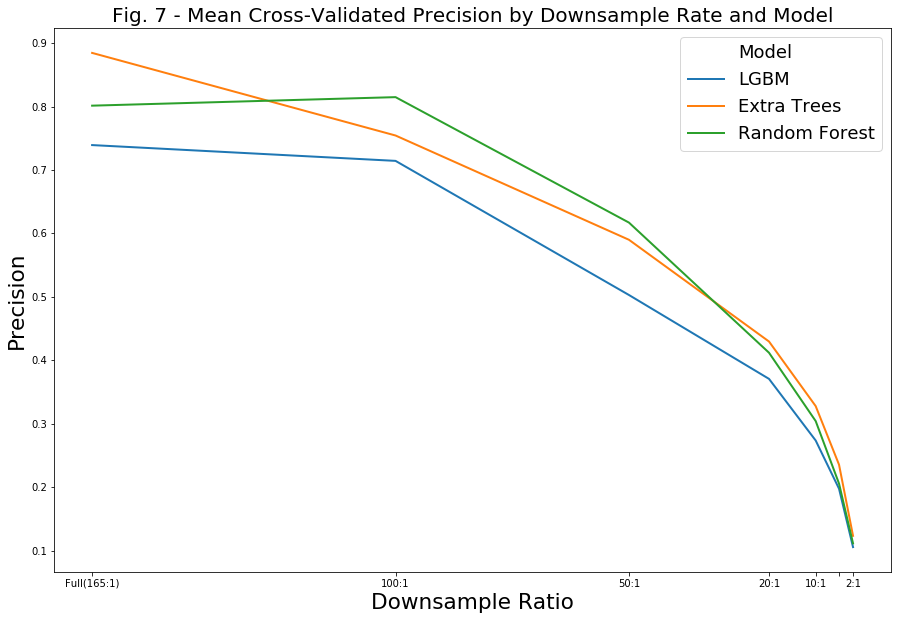

In [291]:
plt.figure(figsize=(15, 10))
rcParams['figure.figsize'] = 15, 10
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 18
ax = sns.lineplot(x='Sample Ratio', y='Precision', hue='Model', data = crossValResults)
ax.invert_xaxis()
ax.set_title('Fig. 7 - Mean Cross-Validated Precision by Downsample Rate and Model')
ax.set_xticks([165, 100,50,20,10,5,2])
ax.set_xticklabels(['Full(165:1)', '100:1', '50:1', '20:1', '10:1','', '2:1'])
ax.set_xlabel('Downsample Ratio')
plt.show()

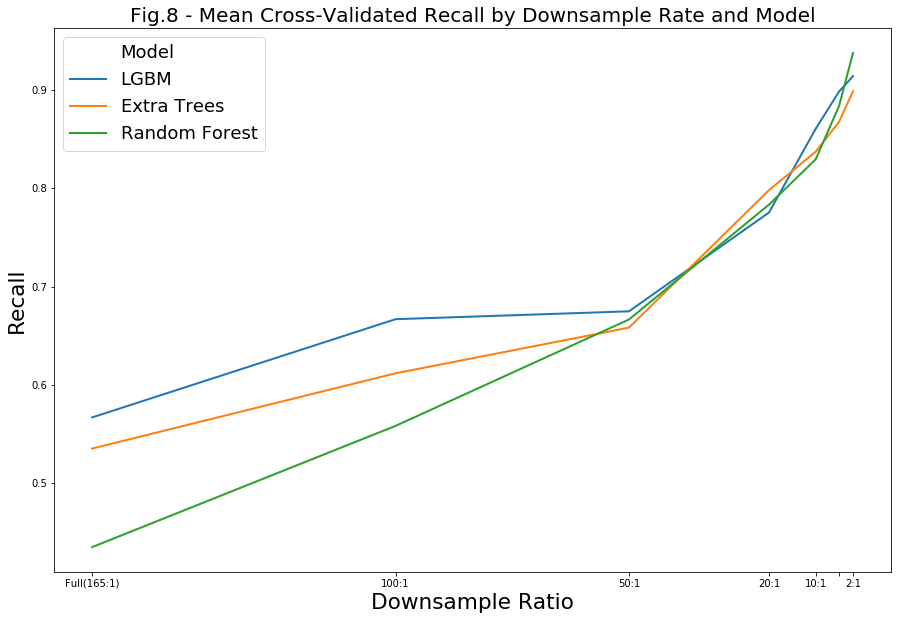

In [292]:
plt.figure(figsize=(15, 10))
rcParams['figure.figsize'] = 15, 10
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 18
ax = sns.lineplot(x='Sample Ratio', y='Recall', hue='Model', data = crossValResults)
ax.invert_xaxis()
ax.set_title('Fig.8 - Mean Cross-Validated Recall by Downsample Rate and Model')
ax.set_xticks([165, 100,50,20,10,5,2])
ax.set_xticklabels(['Full(165:1)', '100:1', '50:1', '20:1', '10:1','', '2:1'])
ax.set_xlabel('Downsample Ratio')
plt.show()

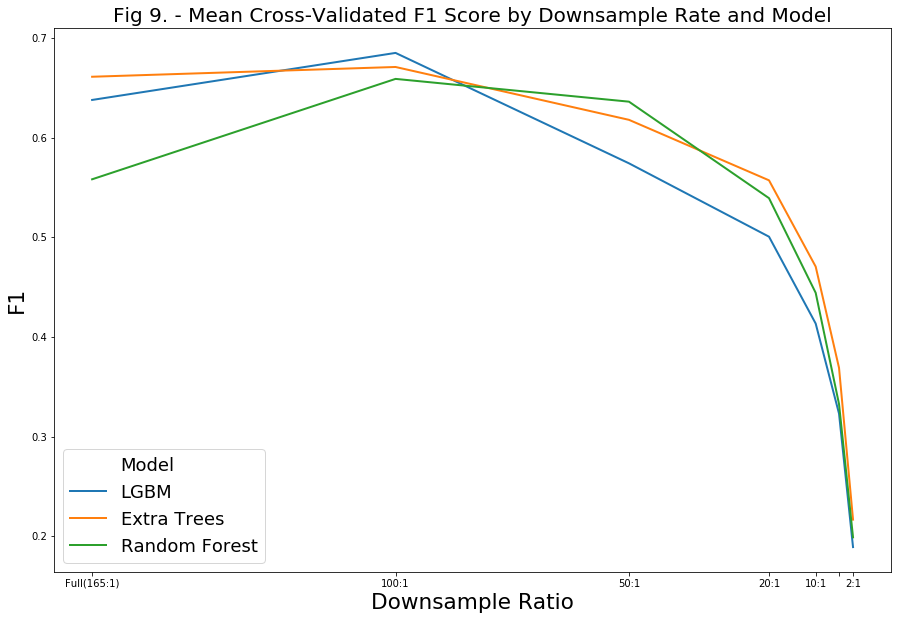

In [293]:
plt.figure(figsize=(15, 10))
rcParams['figure.figsize'] = 15, 10
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 18
ax = sns.lineplot(x='Sample Ratio', y='F1', hue='Model', data = crossValResults)
ax.invert_xaxis()
ax.set_title('Fig 9. - Mean Cross-Validated F1 Score by Downsample Rate and Model')
ax.set_xticks([165, 100,50,20,10,5,2])
ax.set_xticklabels(['Full(165:1)', '100:1', '50:1', '20:1', '10:1','', '2:1'])
ax.set_xlabel('Downsample Ratio')
plt.show()

In [59]:
cols = list(crossValResults.columns[2:])
crossValResults[cols] = crossValResults[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [60]:
crossValResultsShort = crossValResults.head(12)
crossValResultsShort

,Model,Down-sample Ratio,Precision,Recall,F1,Sample
0,LGBM,100:1,0.714369,0.666769,0.685243,100.0
1,Extra Trees,100:1,0.754360,0.611692,0.671119,100.0
2,Extra Trees,None (full sample),0.884561,0.535077,0.661317,165.0
3,Random Forest,100:1,0.814839,0.558154,0.659163,100.0
4,LGBM,None (full sample),0.739273,0.566769,0.638022,165.0
5,Random Forest,50:1,0.617086,0.666462,0.636299,50.0
6,Extra Trees,50:1,0.590000,0.658154,0.618070,50.0
7,LGBM,50:1,0.502949,0.674769,0.574422,50.0
8,Random Forest,None (full sample),0.801411,0.434769,0.558376,165.0
9,Extra Trees,10:1,0.327795,0.837231,0.470736,10.0


In [61]:
crossValResults2 = crossValResults.tail(21).reset_index(drop=True)

In [62]:
crossValResults2

,Model,Down-sample Ratio,Precision,Recall,F1,Sample
0,LGBM,100:1,0.714369,0.666769,0.685243,100.0
1,Extra Trees,100:1,0.754360,0.611692,0.671119,100.0
2,Extra Trees,None (full sample),0.884561,0.535077,0.661317,165.0
3,Random Forest,100:1,0.814839,0.558154,0.659163,100.0
4,LGBM,None (full sample),0.739273,0.566769,0.638022,165.0
5,Random Forest,50:1,0.617086,0.666462,0.636299,50.0
6,Extra Trees,50:1,0.590000,0.658154,0.618070,50.0
7,LGBM,50:1,0.502949,0.674769,0.574422,50.0
8,Random Forest,None (full sample),0.801411,0.434769,0.558376,165.0
9,Extra Trees,20:1,0.429621,0.798154,0.557338,20.0


In [63]:
crossValResults2.head(12) == crossValResultsShort

,Model,Down-sample Ratio,Precision,Recall,F1,Sample
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,False,False,False,False,False


In [64]:
crossValResults=crossValResults2

In [66]:
crossValResults.to_csv('crossValResults.csv')
crossValResultsShort.to_csv('crossValResultsShort.csv')

In [2]:
crossValResults = pd.read_csv('crossValResults.csv')
crossValResultsShort = pd.read_csv('crossValResultsShort.csv')

In [65]:
crossValResults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              21 non-null     object 
 1   Down-sample Ratio  21 non-null     object 
 2   Precision          21 non-null     float64
 3   Recall             21 non-null     float64
 4   F1                 21 non-null     float64
 5   Sample             21 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [3]:
crossValResults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         21 non-null     int64  
 1   Model              21 non-null     object 
 2   Down-sample Ratio  21 non-null     object 
 3   Precision          21 non-null     float64
 4   Recall             21 non-null     float64
 5   F1                 21 non-null     float64
 6   Sample             21 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ KB


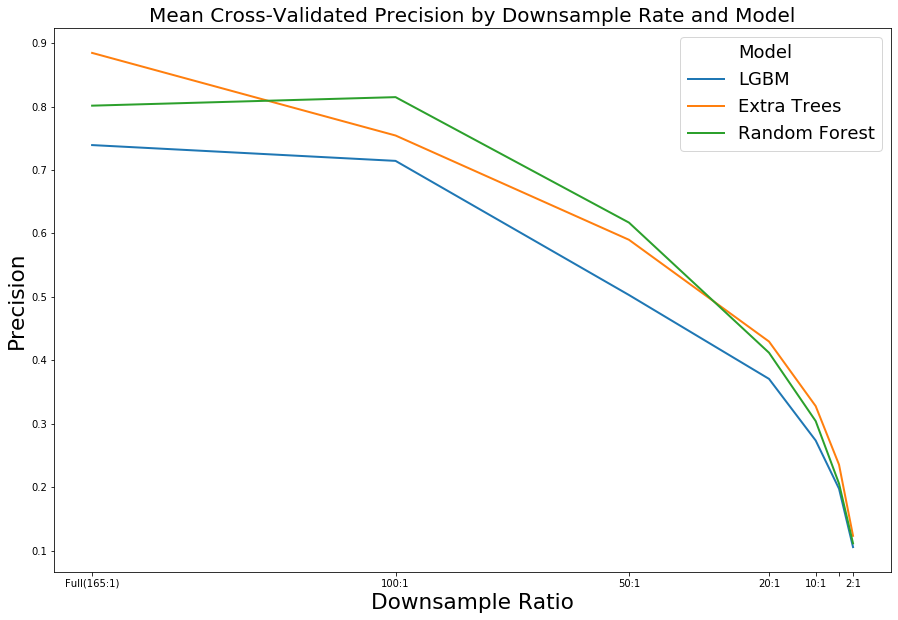

In [77]:
plt.figure(figsize=(15, 10))
rcParams['figure.figsize'] = 15, 10
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 18
ax = sns.lineplot(x='Sample', y='Precision', hue='Model', data = crossValResults)
ax.invert_xaxis()
ax.set_title('Mean Cross-Validated Precision by Downsample Rate and Model')
ax.set_xticks([165, 100,50,20,10,5,2])
ax.set_xticklabels(['Full(165:1)', '100:1', '50:1', '20:1', '10:1','', '2:1'])
ax.set_xlabel('Downsample Ratio')
plt.show()

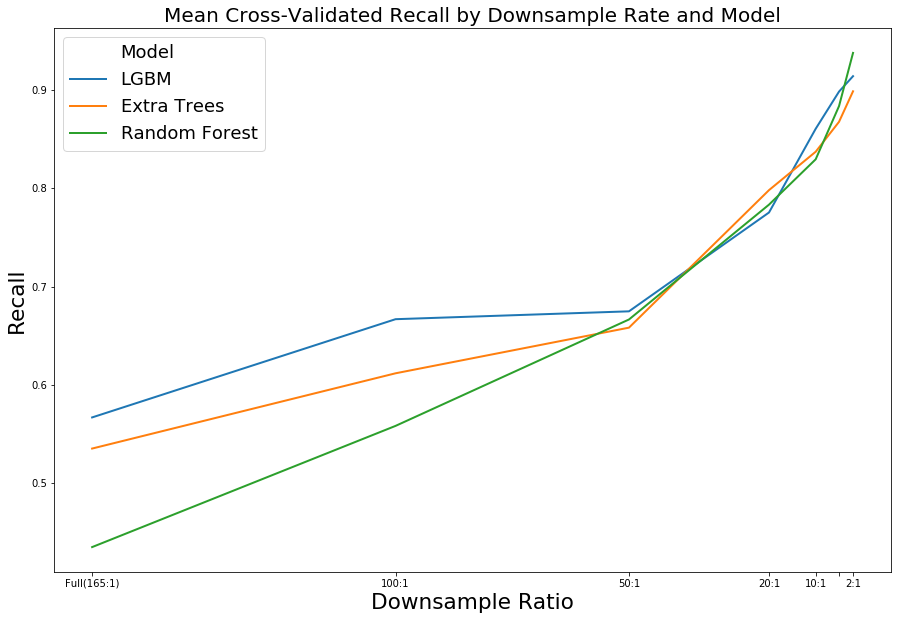

In [78]:
plt.figure(figsize=(15, 10))
rcParams['figure.figsize'] = 15, 10
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 18
ax = sns.lineplot(x='Sample', y='Recall', hue='Model', data = crossValResults)
ax.invert_xaxis()
ax.set_title('Mean Cross-Validated Recall by Downsample Rate and Model')
ax.set_xticks([165, 100,50,20,10,5,2])
ax.set_xticklabels(['Full(165:1)', '100:1', '50:1', '20:1', '10:1','', '2:1'])
ax.set_xlabel('Downsample Ratio')
plt.show()

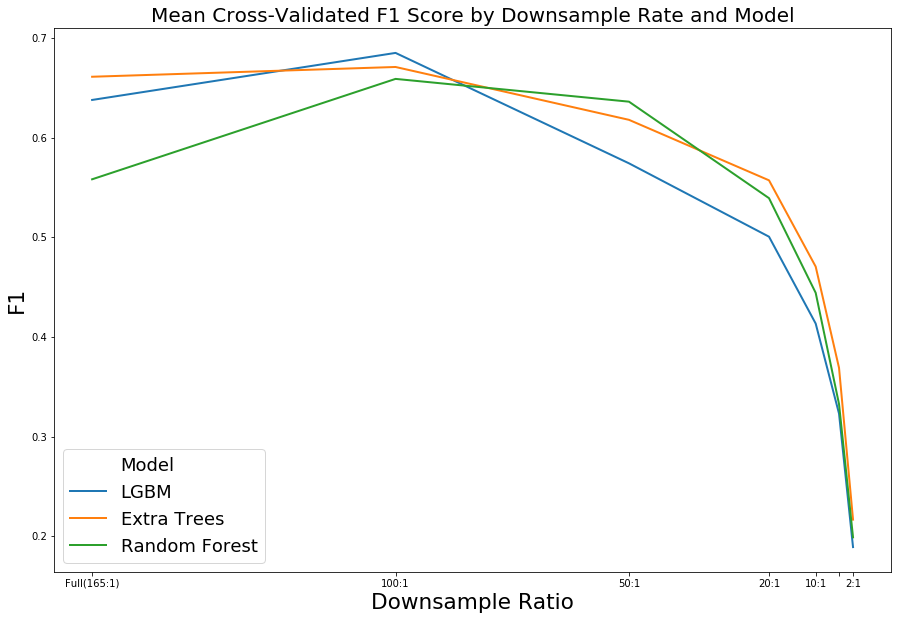

In [79]:
plt.figure(figsize=(15, 10))
rcParams['figure.figsize'] = 15, 10
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 18
ax = sns.lineplot(x='Sample', y='F1', hue='Model', data = crossValResults)
ax.invert_xaxis()
ax.set_title('Mean Cross-Validated F1 Score by Downsample Rate and Model')
ax.set_xticks([165, 100,50,20,10,5,2])
ax.set_xticklabels(['Full(165:1)', '100:1', '50:1', '20:1', '10:1','', '2:1'])
ax.set_xlabel('Downsample Ratio')
plt.show()

## Revised Plots for GIS Paper

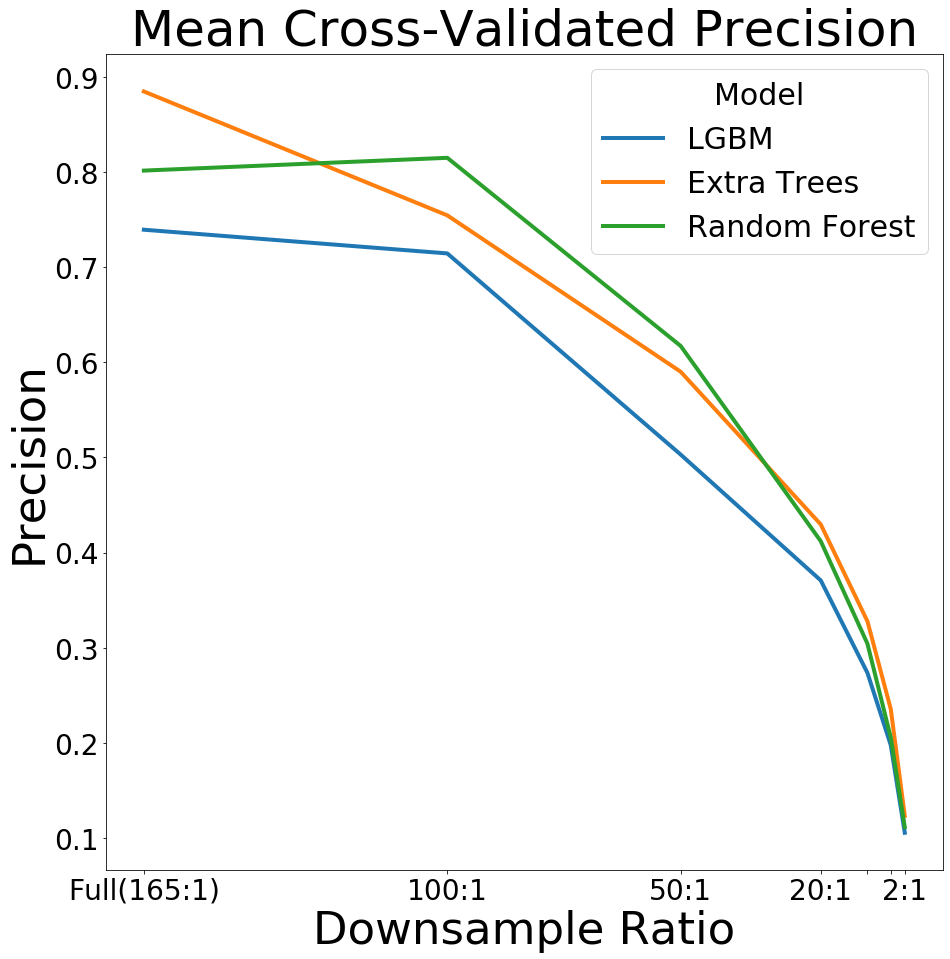

In [69]:
# plt.figure(figsize=(15, 10))
rcParams['figure.figsize'] = 15, 15
rcParams['axes.titlesize'] = 50
rcParams['axes.labelsize'] = 45
rcParams['xtick.labelsize'] = 28
rcParams['ytick.labelsize'] = 28
rcParams['lines.linewidth'] = 4
rcParams['font.size'] = 18
rcParams['legend.fontsize'] = 30
rcParams['legend.title_fontsize'] = 30
# rcParams['axes.legend]
ax = sns.lineplot(x='Sample', y='Precision', hue='Model', data = crossValResults)
ax.invert_xaxis()
ax.set_title('Mean Cross-Validated Precision')
ax.set_xticks([165, 100,50,20,10,5,2])
ax.set_xticklabels(['Full(165:1)', '100:1', '50:1', '20:1', '','', '2:1'])
ax.set_xlabel('Downsample Ratio')
# ax.legend(fontsize="large")
plt.savefig('Fig2Precision.pdf', format='pdf', dpi=300)
plt.show()

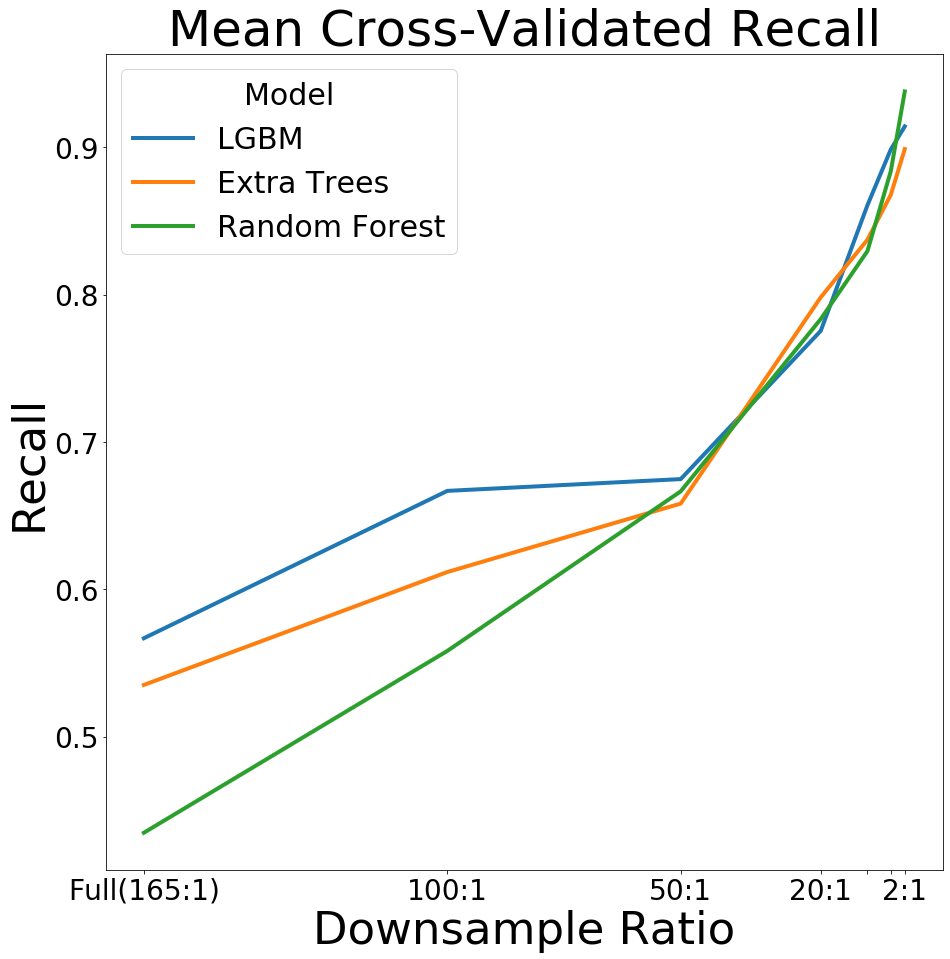

In [70]:
# plt.figure(figsize=(15, 10))
# rcParams['figure.figsize'] = 15, 10
# rcParams['axes.titlesize'] = 20
# rcParams['axes.labelsize'] = 'large'
# rcParams['xtick.labelsize'] = 10
# rcParams['ytick.labelsize'] = 10
# rcParams['lines.linewidth'] = 2
# rcParams['font.size'] = 18
ax = sns.lineplot(x='Sample', y='Recall', hue='Model', data = crossValResults)
ax.invert_xaxis()
ax.set_title('Mean Cross-Validated Recall')
ax.set_xticks([165, 100,50,20,10,5,2])
ax.set_xticklabels(['Full(165:1)', '100:1', '50:1', '20:1', '','', '2:1'])
ax.set_xlabel('Downsample Ratio')
plt.savefig('Fig2Recall.pdf', format='pdf', dpi=300)
plt.show()

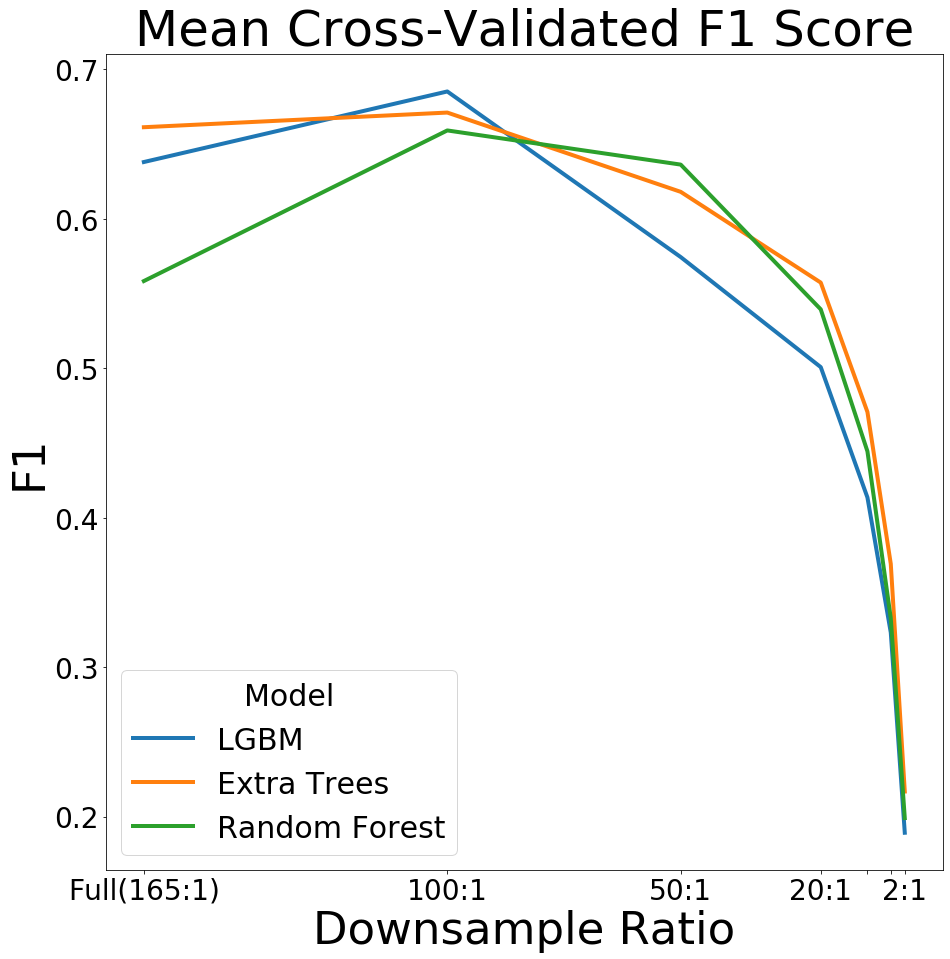

In [71]:
# plt.figure(figsize=(15, 10))
# rcParams['figure.figsize'] = 15, 10
# rcParams['axes.titlesize'] = 20
# rcParams['axes.labelsize'] = 'large'
# rcParams['xtick.labelsize'] = 10
# rcParams['ytick.labelsize'] = 10
# rcParams['lines.linewidth'] = 2
# rcParams['font.size'] = 18
ax = sns.lineplot(x='Sample', y='F1', hue='Model', data = crossValResults)
ax.invert_xaxis()
ax.set_title('Mean Cross-Validated F1 Score')
ax.set_xticks([165, 100,50,20,10,5,2])
ax.set_xticklabels(['Full(165:1)', '100:1', '50:1', '20:1', '','', '2:1'])
ax.set_xlabel('Downsample Ratio')
plt.savefig('Fig2F1.pdf', format='pdf', dpi=300)
plt.show()

In [73]:
crossValResultsShort

,Model,Down-sample Ratio,Precision,Recall,F1,Sample
0,LGBM,100:1,0.714369,0.666769,0.685243,100.0
1,Extra Trees,100:1,0.754360,0.611692,0.671119,100.0
2,Extra Trees,None (full sample),0.884561,0.535077,0.661317,165.0
3,Random Forest,100:1,0.814839,0.558154,0.659163,100.0
4,LGBM,None (full sample),0.739273,0.566769,0.638022,165.0
5,Random Forest,50:1,0.617086,0.666462,0.636299,50.0
6,Extra Trees,50:1,0.590000,0.658154,0.618070,50.0
7,LGBM,50:1,0.502949,0.674769,0.574422,50.0
8,Random Forest,None (full sample),0.801411,0.434769,0.558376,165.0
9,Extra Trees,10:1,0.327795,0.837231,0.470736,10.0


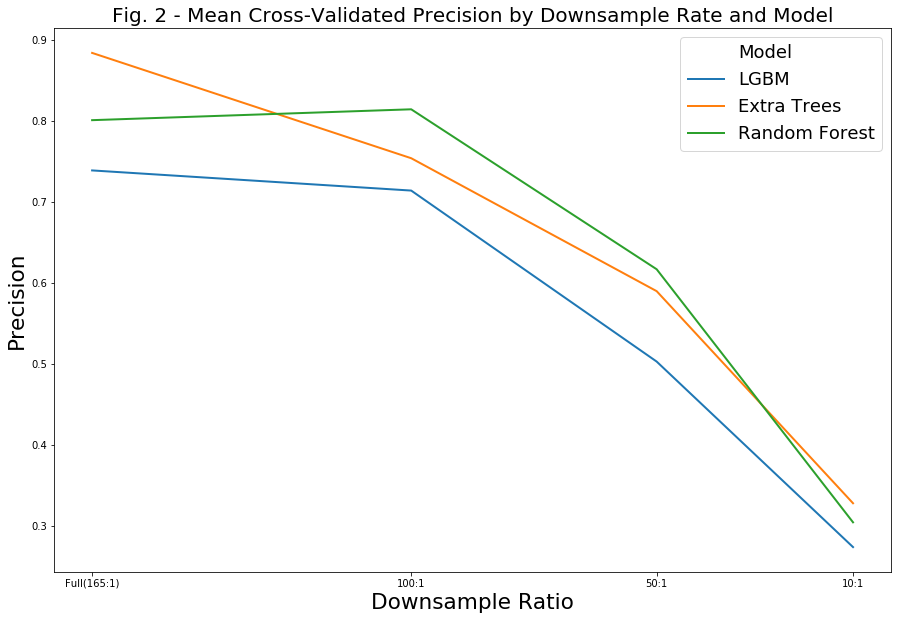

In [74]:
plt.figure(figsize=(15, 10))
rcParams['figure.figsize'] = 15, 10
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 18
ax = sns.lineplot(x='Sample', y='Precision', hue='Model', data = crossValResultsShort)
ax.invert_xaxis()
ax.set_title('Fig. 2 - Mean Cross-Validated Precision by Downsample Rate and Model')
ax.set_xticks([165, 100,50,10])
ax.set_xticklabels(['Full(165:1)', '100:1', '50:1', '10:1'])
ax.set_xlabel('Downsample Ratio')
plt.show()

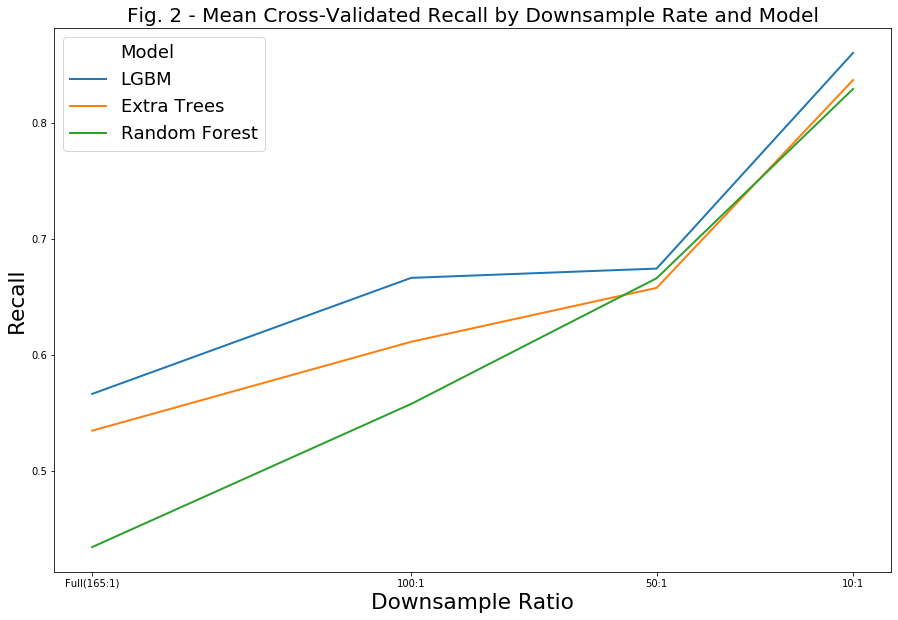

In [75]:
plt.figure(figsize=(15, 10))
rcParams['figure.figsize'] = 15, 10
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 18
ax = sns.lineplot(x='Sample', y='Recall', hue='Model', data = crossValResultsShort)
ax.invert_xaxis()
ax.set_title('Fig. 2 - Mean Cross-Validated Recall by Downsample Rate and Model')
ax.set_xticks([165, 100,50,10])
ax.set_xticklabels(['Full(165:1)', '100:1', '50:1', '10:1'])
ax.set_xlabel('Downsample Ratio')
plt.show()

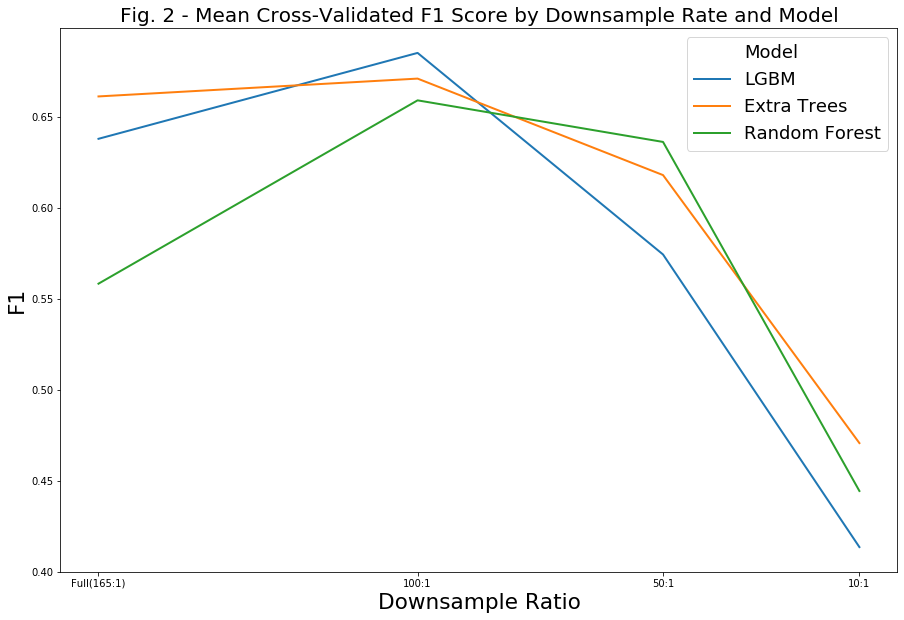

In [76]:
plt.figure(figsize=(15, 10))
rcParams['figure.figsize'] = 15, 10
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 18
ax = sns.lineplot(x='Sample', y='F1', hue='Model', data = crossValResultsShort)
ax.invert_xaxis()
ax.set_title('Fig. 2 - Mean Cross-Validated F1 Score by Downsample Rate and Model')
ax.set_xticks([165, 100,50,10])
ax.set_xticklabels(['Full(165:1)', '100:1', '50:1', '10:1'])
ax.set_xlabel('Downsample Ratio')
plt.show()